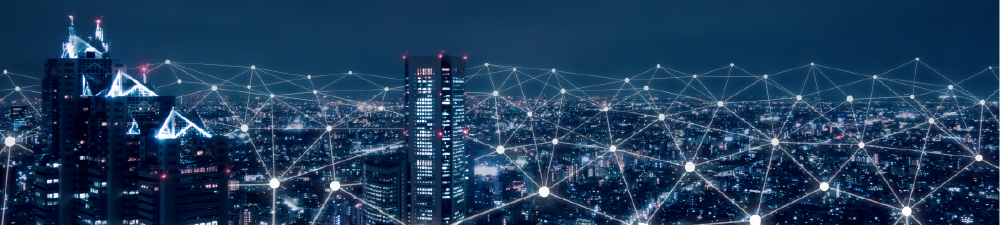

# BDA10 - Group 8 HoRISEn

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import scipy.stats as stats
import sys

from scipy.stats import shapiro
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_theme(style='darkgrid')

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
cust_df=pd.read_csv("Mini_project_3_Data.csv")

# make a copy of the original dataset
df = cust_df.copy()

In [3]:
cust_df.head(5)

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

## Exercise

## Placeholder for your analysis

In [4]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
cust_df.info()

(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [5]:
cust_df.describe()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
count  5.104700e+04    50891.000000    50891.000000          50891.000000   
mean   3.201957e+06       58.834492      525.653416             46.830088   
std    1.169056e+05       44.507336      529.871063             23.848871   
min    3.000002e+06       -6.170000        0.000000            -11.000000   
25%    3.100632e+06       33.610000      158.000000             30.000000   
50%    3.201534e+06       48.460000      366.000000             45.000000   
75%    3.305376e+06       71.065000      723.000000             60.000000   
max    3.399994e+06     1223.380000     7359.000000            400.000000   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
count           50891.000000    50891.000000  50891.000000       50680.000000   
mean                0.895229       40.027785      1.236244         -11.547908   
std                 2.228546       96.588076      9.818294         257.514772   
min                 0.000000        0.000000      0.000000       -3875.000000   
25%                 0.000000        0.000000      0.000000         -83.000000   
50%                 0.250000        3.000000      0.000000          -5.000000   
75%                 0.990000       41.000000      0.300000          66.000000   
max               159.390000     4321.000000   1112.400000        5192.000000   

       PercChangeRevenues  DroppedCalls  ...      Handsets  HandsetModels  \
count        50680.000000  51047.000000  ...  51046.000000   51046.000000   
mean            -1.191985      6.011489  ...      1.805646       1.558751   
std             39.574915      9.043955  ...      1.331173       0.905932   
min          -1107.700000      0.000000  ...      1.000000       1.000000   
25%             -7.100000      0.700000  ...      1.000000       1.000000   
50%             -0.300000      3.000000  ...      1.000000       1.000000   
75%              1.600000      7.700000  ...      2.000000       2.000000   
max           2483.500000    221.700000  ...     24.000000      15.000000   

       CurrentEquipmentDays        AgeHH1        AgeHH2  RetentionCalls  \
count          51046.000000  50138.000000  50138.000000    51047.000000   
mean             380.545841     31.338127     21.144142        0.037201   
std              253.801982     22.094635     23.931368        0.206483   
min               -5.000000      0.000000      0.000000        0.000000   
25%              205.000000      0.000000      0.000000        0.000000   
50%              329.000000     36.000000      0.000000        0.000000   
75%              515.000000     48.000000     42.000000        0.000000   
max             1812.000000     99.000000     99.000000        4.000000   

       RetentionOffersAccepted  ReferralsMadeBySubscriber   IncomeGroup  \
count             51047.000000               51047.000000  51047.000000   
mean                  0.018277                   0.052070      4.324524   
std                   0.142458                   0.307592      3.138236   
min                   0.000000                   0.000000      0.000000   
25%                   0.000000                   0.000000      0.000000   
50%                   0.000000                   0.000000      5.000000   
75%                   0.000000                   0.000000      7.000000   
max                   3.000000                  35.000000      9.000000   

       AdjustmentsToCreditRating  
count               51047.000000  
mean                    0.053911  
std                     0.383147  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     0.000000  
max                    25.000000  

[8 rows x 35 columns]

In [6]:
# check for null
cust_df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [7]:
# Check Duplicate Values

cust_df.duplicated().value_counts()

False    51047
dtype: int64

In [8]:
# Assign a new column 1 = churn, 0 = no churn
cust_df['churn'] = cust_df.apply(lambda x: 1 if x.Churn=='Yes' else 0, axis=1)

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [9]:
#How many customers had zero or less monthly revenue?

cust_zero_rev = (cust_df[('MonthlyRevenue')]==0)
print('Number of customers with zero monthly revenue = {}'.format(sum(cust_zero_rev)))

#Exclude the customers with zero or less monthly revenue from cust_df and from any subsequent analysis
cust_df = cust_df[~(cust_zero_rev)]
cust_df

Number of customers with zero monthly revenue = 6


CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0         3000002   Yes           24.00           219.0                  22.0   
1         3000010   Yes           16.99            10.0                  17.0   
2         3000014    No           38.00             8.0                  38.0   
3         3000022    No           82.28          1312.0                  75.0   
4         3000026   Yes           17.14             0.0                  17.0   
...           ...   ...             ...             ...                   ...   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                       0.25             0.0           0.0             -157.0   
1                       0.00             0.0           0.0               -4.0   
2                       0.00             0.0           0.0               -2.0   
3                       1.24             0.0           0.0              157.0   
4                       0.00             0.0           0.0                0.0   
...                      ...             ...           ...                ...   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  IncomeGroup  OwnsMotorcycle  \
0                   -19.0  ...            4              No   
1                     0.0  ...            5              No   
2                     0.0  ...            6              No   
3                     8.1  ...            6              No   
4                    -0.2  ...            9              No   
...                   ...  ...          ...             ...   
51042                 NaN  ...            6              No   
51043                15.9  ...            9              No   
51044                 NaN  ...            7              No   
51045                 NaN  ...            9              No   
51046                 NaN  ...            0              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
0                              0            30                      Yes   
1                              0            30                       No   
2                              0       Unknown                       No   
3                              0            10                       No   
4                              1            10                       No   
...                          ...           ...                      ...   
51042                          0            60                       No   
51043                          1            60                       No   
51044                          1            80                       No   
51045                          0            30                       No   
51046                          1            60                      Yes   

       CreditRating  PrizmCode    Occupation  MaritalStatus  churn  
0         1-Highest   Suburban  Professional             No      1  
1          4-Medium   Suburban  Professional            Yes      1  
2            3-Good       Town        Crafts            Yes      0  
3          4-Medium      Other         Other             No      0  
4         1-Highest      Other  Professional            Ye

### Q1.2 How many columns has missing values percentage > 5%

In [10]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

threshold = 5

missing_df = (cust_df.isnull().sum() * 100 / cust_df.shape[0]).to_frame().rename(
    columns={0:'missing_values_percentage'}).reset_index()

print('Number of columns has missing values percentage > 5% = {}'.format(
    (missing_df.missing_values_percentage > threshold).sum()))

print('Number of columns with missing values = {}'.format(
    (missing_df.missing_values_percentage >0).sum()))

Number of columns has missing values percentage > 5% = 0
Number of columns with missing values = 14


In [11]:
# Since the % of missing data are very low, ie the max is only 1.7%, it will have minimum impact to drop them 

cust_df.dropna(how='any', inplace=True)

cust_df.shape

(49748, 59)

<mark>__Result:__
    
- There are 14 columns with missing values. As the missing values percentage for all 14 columns is less than 5%, we chose to drop the missing values.



### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

Text(0.5, 0.98, '')

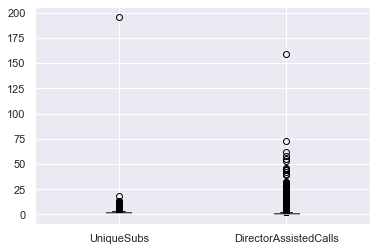

In [12]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"

cols=["UniqueSubs","DirectorAssistedCalls"]

cust_df.boxplot(column=cols)
plt.suptitle('')
plt.show()

<AxesSubplot:>

Text(0.5, 0.98, '')

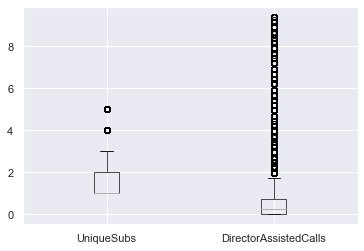

(49040, 59)

In [13]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
# Run one time only

cust_df = cust_df[(cust_df["UniqueSubs"] <= cust_df["UniqueSubs"].quantile(0.99))]
cust_df = cust_df[(cust_df["DirectorAssistedCalls"] <= cust_df["DirectorAssistedCalls"].quantile(0.99))]

cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)
plt.suptitle('')
plt.show()

cust_df.shape

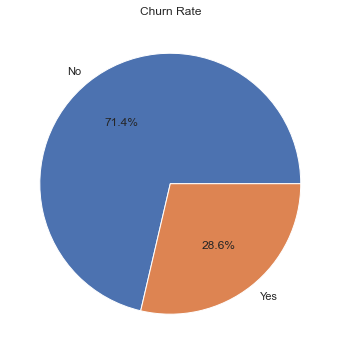

In [14]:
# 1.4 Calculate Churn Percent

churn_labels = cust_df['Churn'].value_counts().keys().tolist()
churn_values = cust_df['Churn'].value_counts().values.tolist()

plt.figure(figsize=(6,6))
plt.pie(churn_values, labels=churn_labels, autopct='%1.1f%%')
plt.title('Churn Rate')
plt.show();

In [15]:
cust_df.shape

(49040, 59)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

The correlation = 78.3%


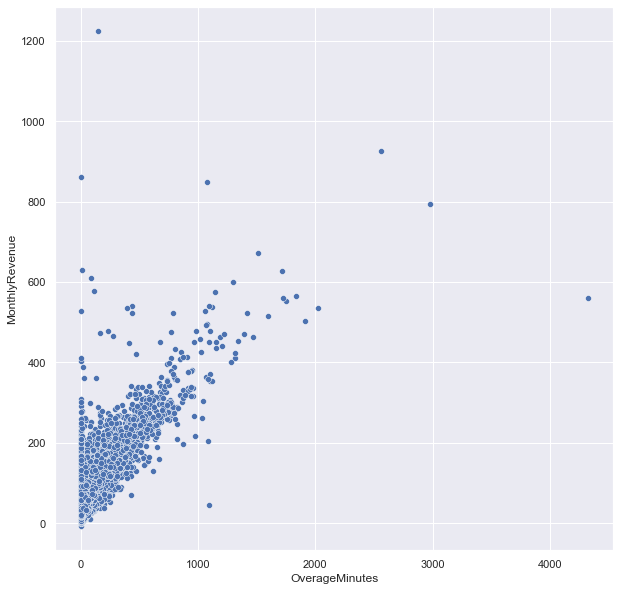

In [16]:
#use scatter plot to find the correlation between monthly revenue and overage minutes

sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = cust_df)

print('The correlation = {:,.1%}'.format(np.corrcoef(cust_df.OverageMinutes, cust_df.MonthlyRevenue)[0,1]))

<mark>__Result:__
    
Yes. With a correlation of 78.3%, customers with high overage minutes also have high revenue.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

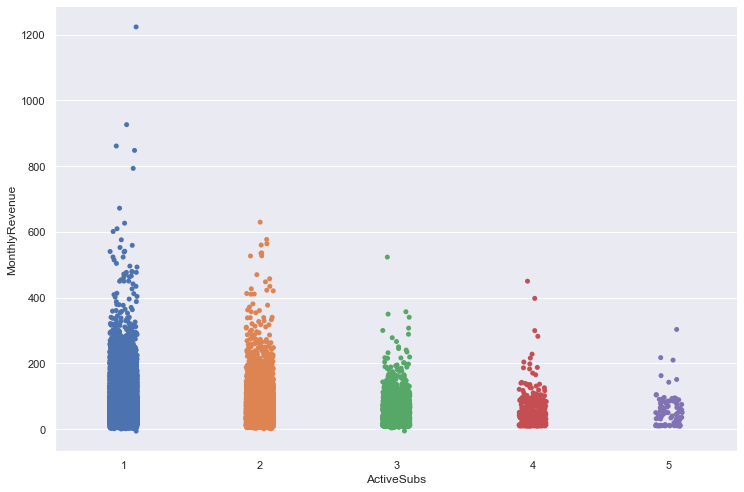

The correlation = -4.8%


In [17]:
#use category plot to plot monthly revenue for each active subs category

df_temp=cust_df[(cust_df.ActiveSubs>0)]
sns.catplot(data=df_temp, x='ActiveSubs', y='MonthlyRevenue', aspect=1.5, height=7)

plt.show()

print('The correlation = {:,.1%}'.format(np.corrcoef(df_temp.ActiveSubs, df_temp.MonthlyRevenue)[0,1]))

<mark>__Result:__
    
Yes. With a negative correlation of -4.8%, the higher the number of active subscribers, the lower the monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

[Text(0, 0, '0.30665'),
 Text(0, 0, '0.300022'),
 Text(0, 0, '0.307854'),
 Text(0, 0, '0.257426'),
 Text(0, 0, '0.217918'),
 Text(0, 0, '0.26322'),
 Text(0, 0, '0.287051')]

Text(0.5, 1.0, 'CreditRating Churn Rate')

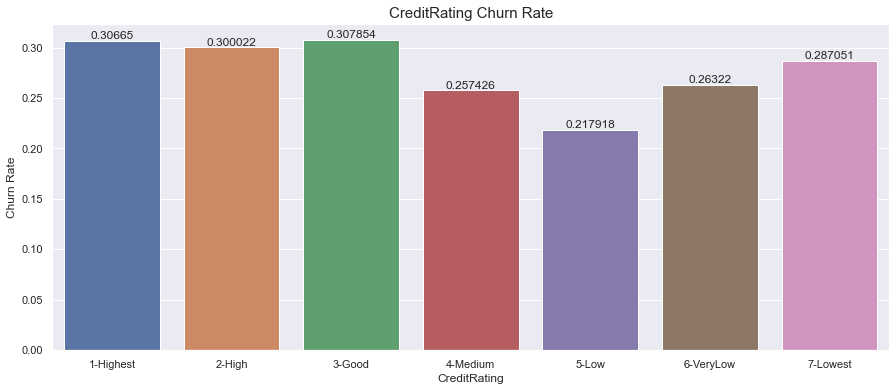

In [18]:
df_sort = cust_df['CreditRating'].unique()
df_sort.sort()

df_credit = cust_df.groupby(['CreditRating', 'churn'])['CustomerID'].count().unstack().reset_index()
df_credit.columns = ['CreditRating', 'NoChurn', 'Churn']
df_credit['Churn Rate'] = df_credit['Churn'] / (df_credit['NoChurn'] + df_credit['Churn'])

#df_credit.Total.plot(kind='bar', x='CreditRating')

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax = sns.barplot(data=df_credit, y='Churn Rate', x='CreditRating', order=df_sort, )
ax.bar_label(ax.containers[0])
plt.title('CreditRating Churn Rate', fontsize=15)

In [19]:
df_credit

CreditRating  NoChurn  Churn  Churn Rate
0    1-Highest     5682   2513    0.306650
1       2-High    12972   5560    0.300022
2       3-Good     5596   2489    0.307854
3     4-Medium     3825   1326    0.257426
4        5-Low     4845   1350    0.217918
5    6-VeryLow      627    224    0.263220
6     7-Lowest     1448    583    0.287051

Text(0.5, 1.0, 'Bar Count CreditRating')

Text(-0.2, 2553, '30.7%')

Text(0.2, 5722, '69.3%')

Text(0.8, 5600, '30.0%')

Text(1.2, 13012, '70.0%')

Text(1.8, 2529, '30.8%')

Text(2.2, 5636, '69.2%')

Text(2.8, 1366, '25.7%')

Text(3.2, 3865, '74.3%')

Text(3.8, 1390, '21.8%')

Text(4.2, 4885, '78.2%')

Text(4.8, 264, '26.3%')

Text(5.2, 667, '73.7%')

Text(5.8, 623, '28.7%')

Text(6.2, 1488, '71.3%')

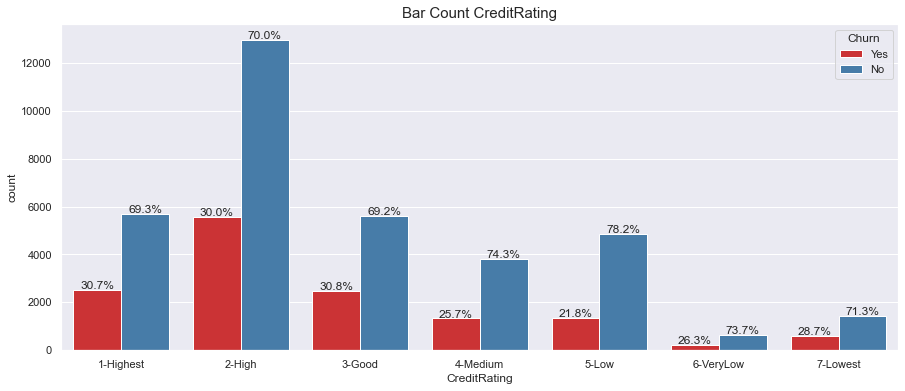

In [20]:
# Q2.3 Does credit rating have an impact in churn rate?

df_sort = cust_df['CreditRating'].unique()
df_sort.sort()

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax = sns.countplot(data=cust_df, x='CreditRating', order=df_sort, hue='Churn', palette='Set1',)
plt.title('Bar Count CreditRating', fontsize=15)
    
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), 
            ha="center", fontsize=12)
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), 
            ha="center", fontsize=12)
plt.show()

In [21]:
# Copy to tempdataframe
df_temp = cust_df.copy()

# Create credit_rating numeric column
df_temp['credit_rating'] = df_temp['CreditRating'].astype(str).str[0]
df_temp['credit_rating'] = df_temp['credit_rating'].astype(int)

print('The correlation = ', np.corrcoef(df_temp.credit_rating, df_temp.churn)[0,1])

The correlation =  -0.047079263057141274


<mark>__Result:__
    
Minimal impact. The difference in Churn rate across all 7 Credit Rating scores - from the lowest at 21.8% for 5-Low and highest at 30.8% for 3-Good - is less than 10%.
    
However, there is a noticeable difference in % between Credit Ratings 1, 2 and 3 and Credit Ratings 4, 5, 6 and 7. 
    
As such, we decided to split the Credit Ratings into 2 bins as illustrated in the bar chart 'Bar Count with new criteria Credit Rating' below:
- Rating 1, 2, 3 --> 'high', where the churn rate is between 30.0% to 30.8% ( with a mean of 30.3%)
- Rating 4, 5, 6, 7 --> 'low' , where the churn rate is between 21.8% to 28.7% (with a mean of 24.5%)
    
    
    
 

Text(0.5, 1.0, 'Bar Count with new criteria CreditRating')

Text(-0.2, 10602, '30.3%')

Text(0.2, 24290, '69.7%')

Text(0.8, 3523, '24.5%')

Text(1.2, 10785, '75.5%')

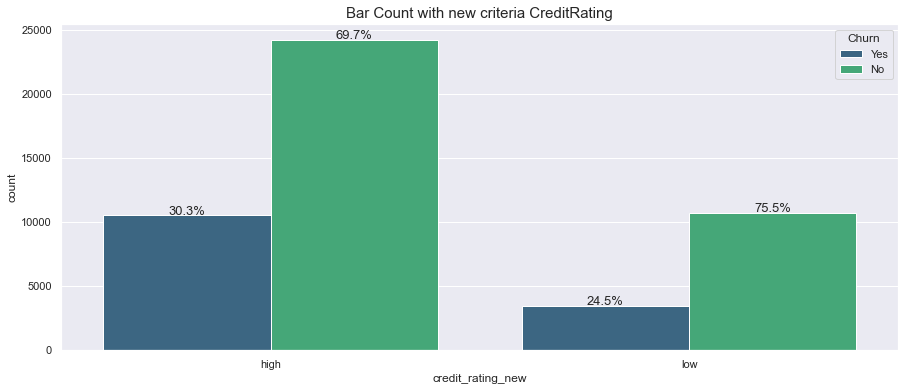

In [22]:
# create new column with new criteria to plot
df_temp['credit_rating_new'] = df_temp.apply(lambda x: 'high' if x.credit_rating <=3 else 'low', axis=1)

fig, ax = plt.subplots(1,1, figsize=(15,6))
df_sort = df_temp['credit_rating_new'].unique()
df_sort.sort()
ax = sns.countplot(data=df_temp, x='credit_rating_new', order=df_sort, hue='Churn', palette='viridis',)
plt.title('Bar Count with new criteria CreditRating', fontsize=15)
    
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), 
            ha="center", fontsize=13)
    ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), 
            ha="center", fontsize=13)
plt.show()

### Placeholder for additional exploratory analysis

In [23]:
# 2.4 check unique values and count for categorical columns

for column in cust_df.columns:
    if cust_df[column].dtype == 'object':
        print('{} count {} : {}'.format(column, len(cust_df[column].unique()), cust_df[column].unique()))

Churn count 2 : ['Yes' 'No']
ServiceArea count 741 : ['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602' 'NNYBUF716'
 'NNYSYR315' 'STLSTL314' 'DETTOL419' 'SEABLV425' 'MIAMIA305' 'PHICHC215'
 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'PHIPHI215' 'LOUNAL812' 'MIADEL561'
 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'NNYROC716' 'MIANDA305' 'MINSTP612'
 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561' 'SEAOLY360'
 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SFRSAC916' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201'
 'SFRPAL650' 'DETDET313' 'DETROS810' 'NYCNEW908' 'NYCNAS516' 'NSHCOL615

- We decided to drop columns 'CustomerID' and 'ServiceArea' as they contain too many sub-categories.
- Subsequently, we created two revised lists for categorical and numeric features

In [24]:
# Revised lists and count of categorical and numeric features

categorical_features = ['ChildrenInHH','HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
            'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 
            'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 
            'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'HandsetPrice',
            'MaritalStatus']

numeric_features = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels','CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 
        'RetentionOffersAccepted','ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

print('Numbers of categorical features = ',len(categorical_features))
print('Numbers of numeric features = ',len(numeric_features))

Numbers of categorical features =  21
Numbers of numeric features =  34


- Count of initial variables = 57 (23 Cat, 34 Num)
- Count of revised variables = 55 (21 Cat, 34 Num)

### Categorical Data Analysis

Text(0.5, 1.0, 'Count Plot ChildrenInHH')

Text(-0.2, 10541, '28.4%')

Text(0.2, 26491, '71.6%')

Text(0.8, 3584, '29.3%')

Text(1.2, 8584, '70.7%')

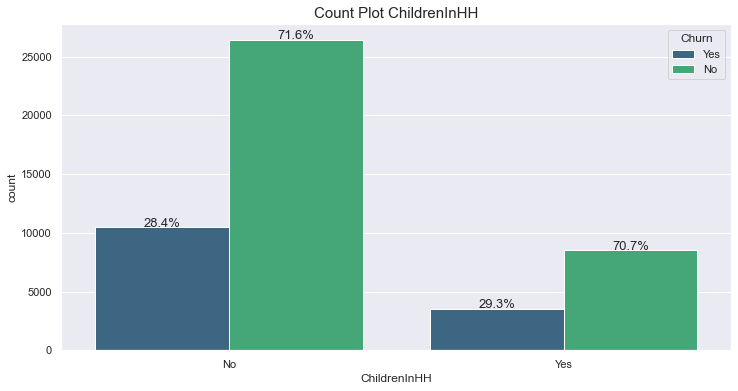

Text(0.5, 1.0, 'Count Plot HandsetRefurbished')

Text(-0.2, 11919, '28.1%')

Text(0.2, 30433, '71.9%')

Text(0.8, 2206, '32.0%')

Text(1.2, 4642, '68.0%')

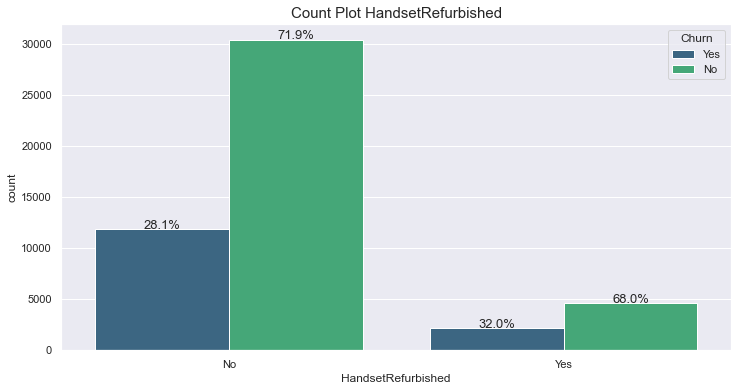

Text(0.5, 1.0, 'Count Plot HandsetWebCapable')

Text(-0.2, 1825, '37.1%')

Text(0.2, 3061, '62.9%')

Text(0.8, 12300, '27.7%')

Text(1.2, 32014, '72.3%')

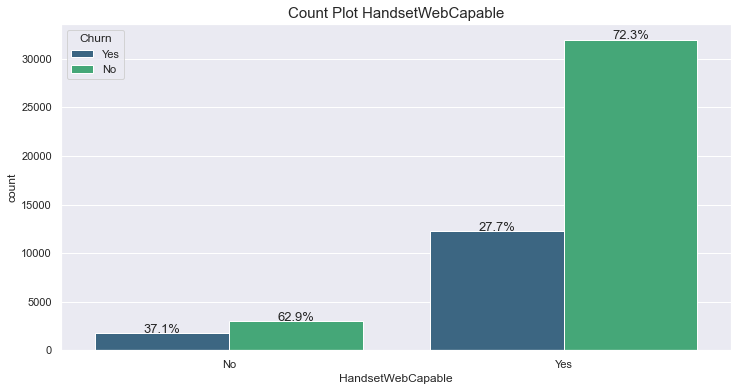

Text(0.5, 1.0, 'Count Plot TruckOwner')

Text(-0.2, 11463, '28.8%')

Text(0.2, 28314, '71.2%')

Text(0.8, 2662, '28.1%')

Text(1.2, 6761, '71.9%')

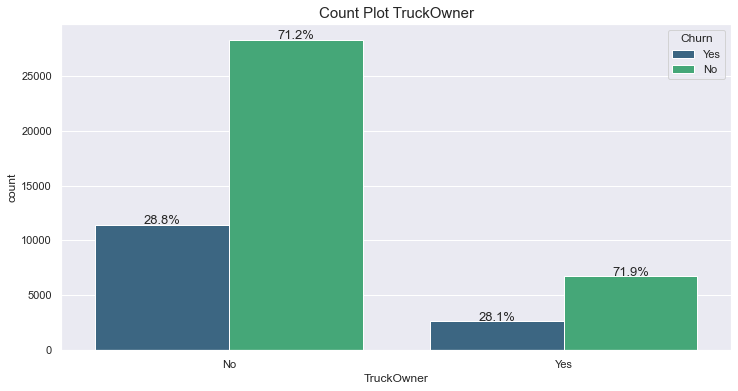

Text(0.5, 1.0, 'Count Plot RVOwner')

Text(-0.2, 12946, '28.7%')

Text(0.2, 32107, '71.3%')

Text(0.8, 1179, '28.0%')

Text(1.2, 2968, '72.0%')

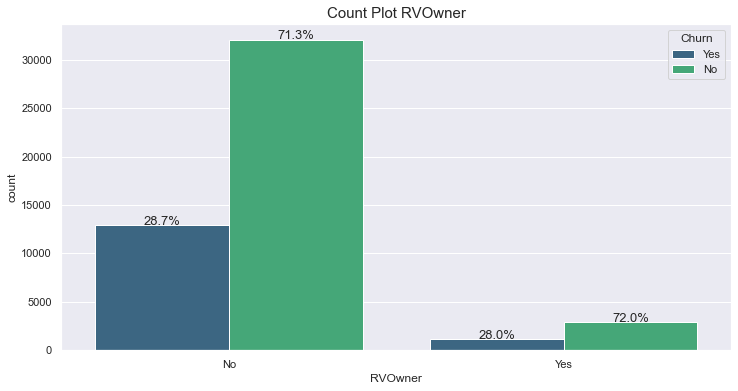

Text(0.5, 1.0, 'Count Plot Homeownership')

Text(-0.2, 9426, '28.2%')

Text(0.2, 23939, '71.8%')

Text(0.8, 4699, '29.6%')

Text(1.2, 11136, '70.4%')

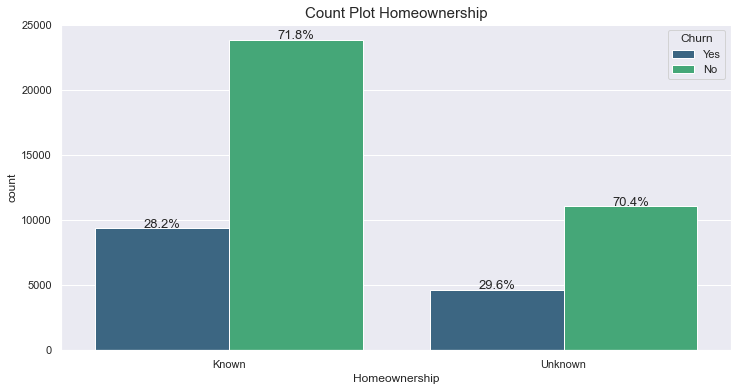

Text(0.5, 1.0, 'Count Plot BuysViaMailOrder')

Text(-0.2, 9158, '29.5%')

Text(0.2, 21862, '70.5%')

Text(0.8, 4967, '27.2%')

Text(1.2, 13213, '72.8%')

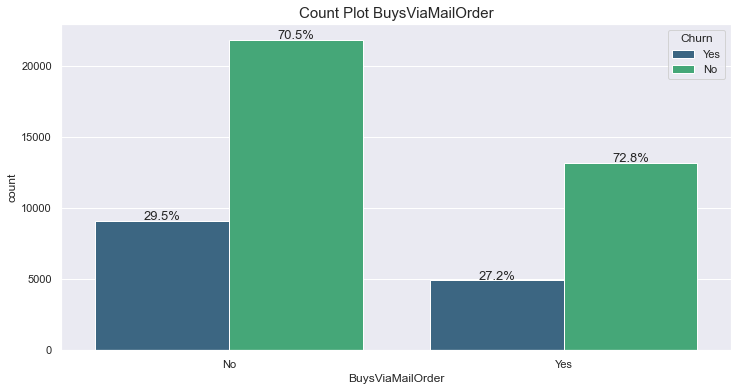

Text(0.5, 1.0, 'Count Plot RespondsToMailOffers')

Text(-0.2, 8955, '29.5%')

Text(0.2, 21310, '70.5%')

Text(0.8, 5170, '27.2%')

Text(1.2, 13765, '72.8%')

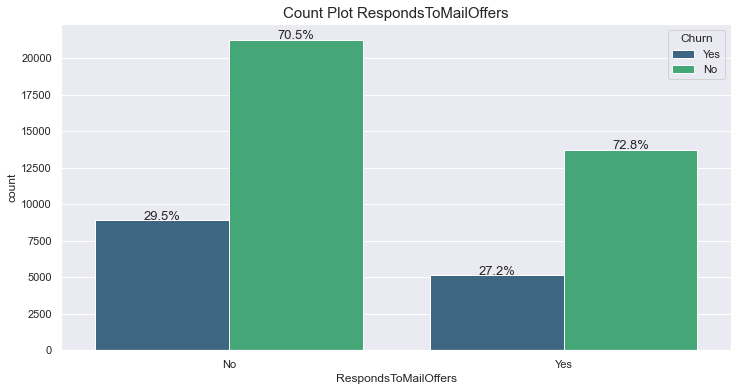

Text(0.5, 1.0, 'Count Plot OptOutMailings')

Text(-0.2, 13870, '28.6%')

Text(0.2, 34508, '71.4%')

Text(0.8, 255, '29.0%')

Text(1.2, 567, '71.0%')

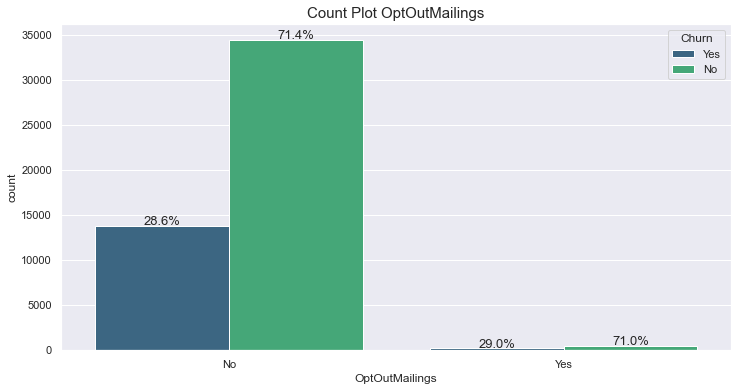

Text(0.5, 1.0, 'Count Plot NonUSTravel')

Text(-0.2, 13294, '28.7%')

Text(0.2, 33000, '71.3%')

Text(0.8, 831, '28.0%')

Text(1.2, 2075, '72.0%')

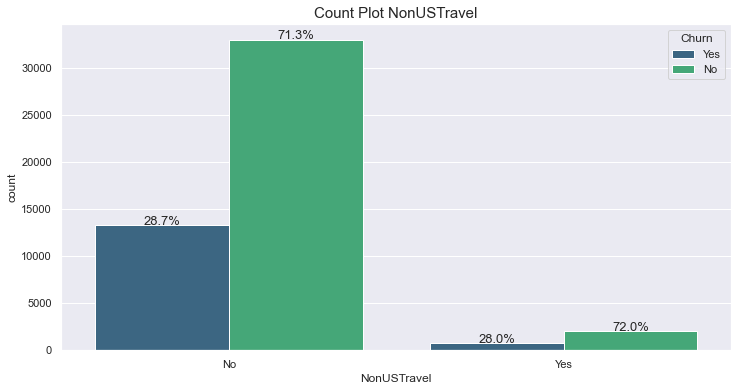

Text(0.5, 1.0, 'Count Plot OwnsComputer')

Text(-0.2, 11447, '28.7%')

Text(0.2, 28383, '71.3%')

Text(0.8, 2678, '28.4%')

Text(1.2, 6692, '71.6%')

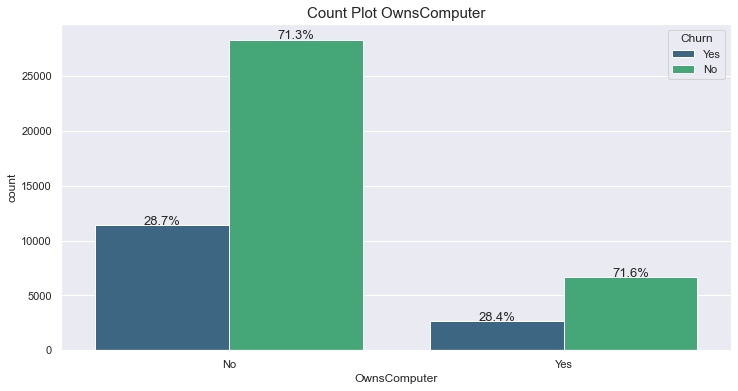

Text(0.5, 1.0, 'Count Plot HasCreditCard')

Text(-0.2, 4501, '29.3%')

Text(0.2, 10813, '70.7%')

Text(0.8, 9624, '28.3%')

Text(1.2, 24262, '71.7%')

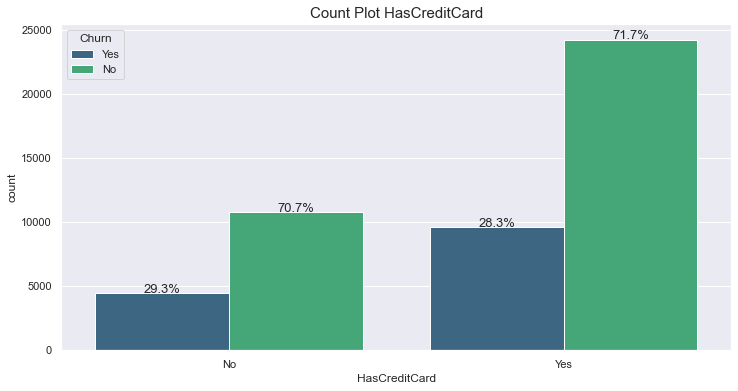

Text(0.5, 1.0, 'Count Plot NewCellphoneUser')

Text(-0.2, 11435, '28.8%')

Text(0.2, 28220, '71.2%')

Text(0.8, 2690, '28.0%')

Text(1.2, 6855, '72.0%')

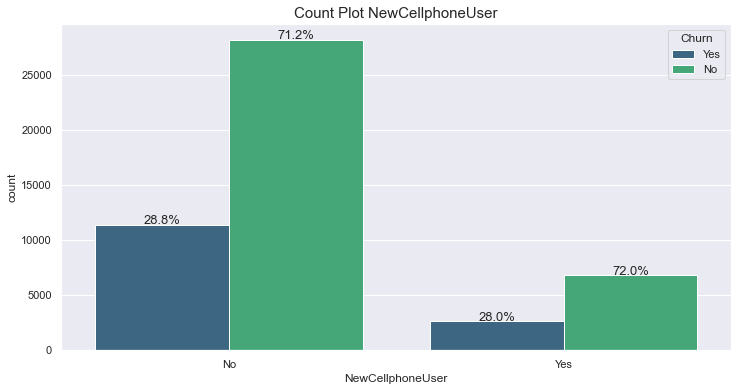

Text(0.5, 1.0, 'Count Plot NotNewCellphoneUser')

Text(-0.2, 12112, '28.5%')

Text(0.2, 30286, '71.5%')

Text(0.8, 2013, '29.4%')

Text(1.2, 4789, '70.6%')

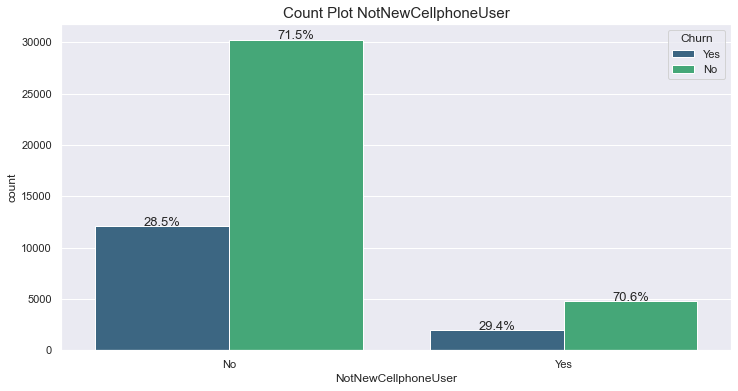

Text(0.5, 1.0, 'Count Plot OwnsMotorcycle')

Text(-0.2, 13878, '28.6%')

Text(0.2, 34580, '71.4%')

Text(0.8, 247, '31.3%')

Text(1.2, 495, '68.7%')

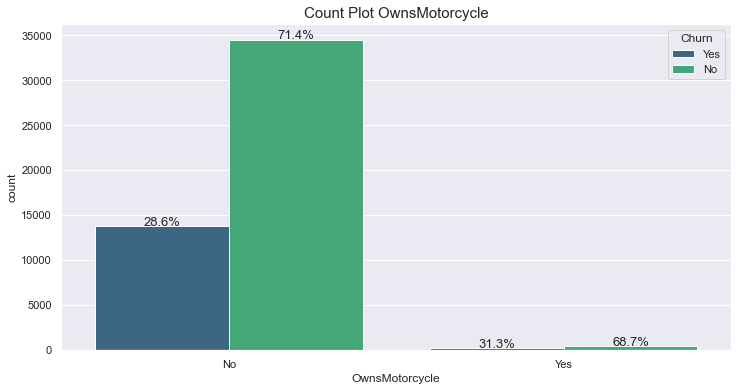

Text(0.5, 1.0, 'Count Plot MadeCallToRetentionTeam')

Text(-0.2, 13392, '28.1%')

Text(0.2, 34140, '71.9%')

Text(0.8, 733, '43.6%')

Text(1.2, 935, '56.4%')

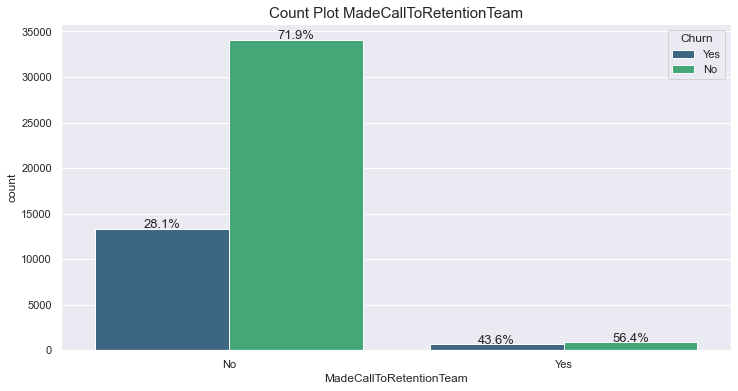

Text(0.5, 1.0, 'Count Plot CreditRating')

Text(-0.2, 2553, '30.7%')

Text(0.2, 5722, '69.3%')

Text(0.8, 5600, '30.0%')

Text(1.2, 13012, '70.0%')

Text(1.8, 2529, '30.8%')

Text(2.2, 5636, '69.2%')

Text(2.8, 1366, '25.7%')

Text(3.2, 3865, '74.3%')

Text(3.8, 1390, '21.8%')

Text(4.2, 4885, '78.2%')

Text(4.8, 264, '26.3%')

Text(5.2, 667, '73.7%')

Text(5.8, 623, '28.7%')

Text(6.2, 1488, '71.3%')

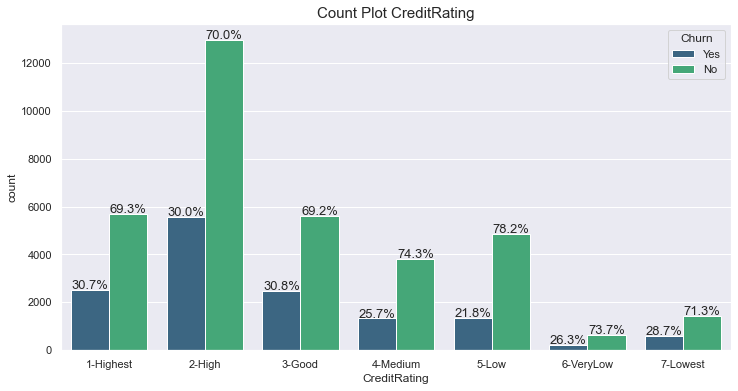

Text(0.5, 1.0, 'Count Plot PrizmCode')

Text(-0.2, 6725, '28.5%')

Text(0.2, 16845, '71.5%')

Text(0.8, 775, '31.1%')

Text(1.2, 1670, '68.9%')

Text(1.8, 4460, '28.0%')

Text(2.2, 11412, '72.0%')

Text(2.8, 2245, '29.8%')

Text(3.2, 5228, '70.2%')

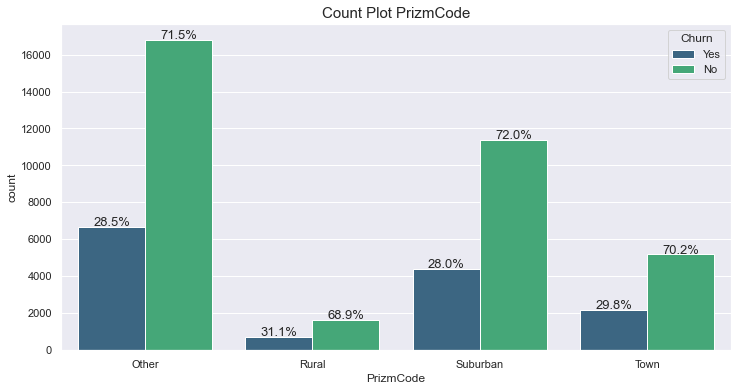

Text(0.5, 1.0, 'Count Plot Occupation')

Text(-0.2, 324, '29.3%')

Text(0.2, 724, '70.7%')

Text(0.8, 460, '28.0%')

Text(1.2, 1119, '72.0%')

Text(1.8, 91, '32.5%')

Text(2.2, 146, '67.5%')

Text(2.8, 10398, '28.9%')

Text(3.2, 25574, '71.1%')

Text(3.8, 2446, '28.1%')

Text(4.2, 6203, '71.9%')

Text(4.8, 221, '25.1%')

Text(5.2, 580, '74.9%')

Text(5.8, 273, '27.1%')

Text(6.2, 668, '72.9%')

Text(6.8, 152, '30.0%')

Text(7.2, 301, '70.0%')

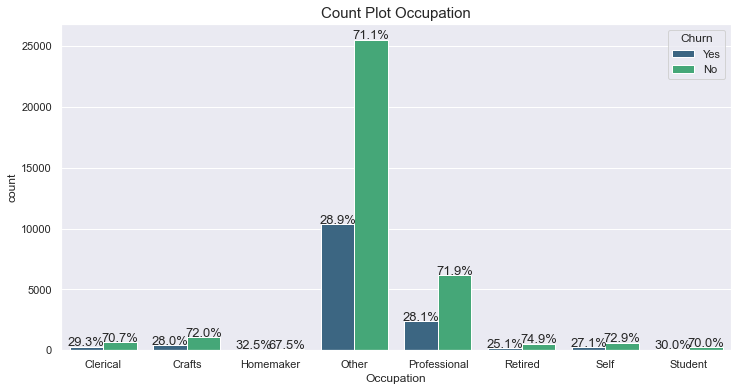

Text(0.5, 1.0, 'Count Plot HandsetPrice')

Text(-0.2, 524, '26.4%')

Text(0.2, 1388, '73.6%')

Text(0.8, 358, '27.1%')

Text(1.2, 896, '72.9%')

Text(1.8, 550, '25.6%')

Text(2.2, 1523, '74.4%')

Text(2.8, 1093, '26.6%')

Text(3.2, 2939, '73.4%')

Text(3.8, 41, '14.3%')

Text(4.2, 46, '85.7%')

Text(4.8, 367, '27.7%')

Text(5.2, 892, '72.3%')

Text(5.8, 41, '25.0%')

Text(6.2, 43, '75.0%')

Text(6.8, 49, '45.0%')

Text(7.2, 51, '55.0%')

Text(7.8, 1920, '26.7%')

Text(8.2, 5195, '73.3%')

Text(8.8, 42, '22.2%')

Text(9.2, 47, '77.8%')

Text(9.8, 115, '32.2%')

Text(10.2, 198, '67.8%')

Text(10.8, 49, '22.0%')

Text(11.2, 72, '78.0%')

Text(11.8, 41, '14.3%')

Text(12.2, 46, '85.7%')

Text(12.8, 510, '27.7%')

Text(13.2, 1267, '72.3%')

Text(13.8, 535, '27.0%')

Text(14.2, 1376, '73.0%')

Text(14.8, 8450, '30.0%')

Text(15.2, 19656, '70.0%')

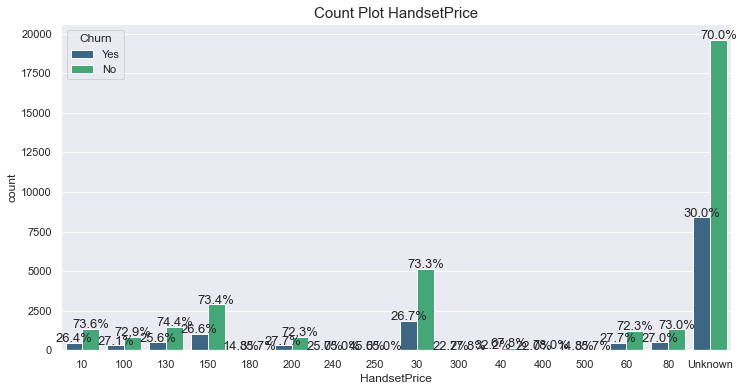

Text(0.5, 1.0, 'Count Plot MaritalStatus')

Text(-0.2, 3384, '26.9%')

Text(0.2, 9137, '73.1%')

Text(0.8, 5566, '30.1%')

Text(1.2, 12849, '69.9%')

Text(1.8, 5215, '28.3%')

Text(2.2, 13129, '71.7%')

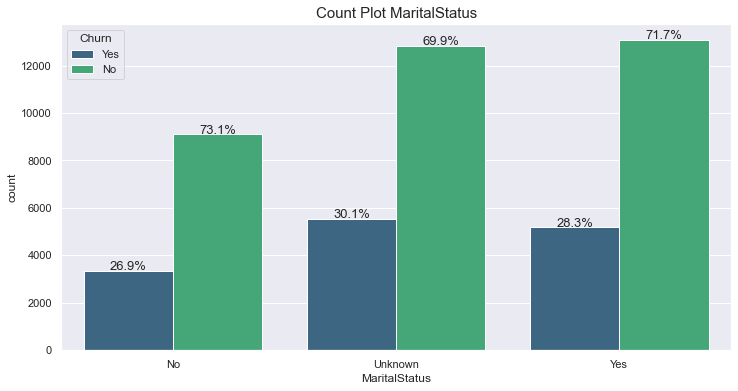

In [25]:
for col in categorical_features:
    fig, ax = plt.subplots(1,1, figsize=(12,6))
    
    df_sort = cust_df[col].unique()
    df_sort.sort()
    ax = sns.countplot(data=cust_df, x=col, order=df_sort, hue='Churn', palette='viridis',)
    plt.title('Count Plot ' + col, fontsize=15)
    
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), 
                ha="center", fontsize=13)
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), 
                ha="center", fontsize=13)
    plt.show()


In performing the EDA for categorical features, we decided to further remove a number of variables from future consideration due to the lack of sufficient data. Our main criteria for removal centres on count rates so negligible that they do not affect the overall readings. These variables include:

- 'RVOwner'
- 'OptOutMailings'
- 'NonUSTravel'
- 'OwnsMotorcycle'
- 'Occupation'
- 'HandsetPrice'



### Numeric Data Analysis

<AxesSubplot:title={'center':'MonthlyRevenue'}, xlabel='Churn'>

Text(0.5, 0.98, '')

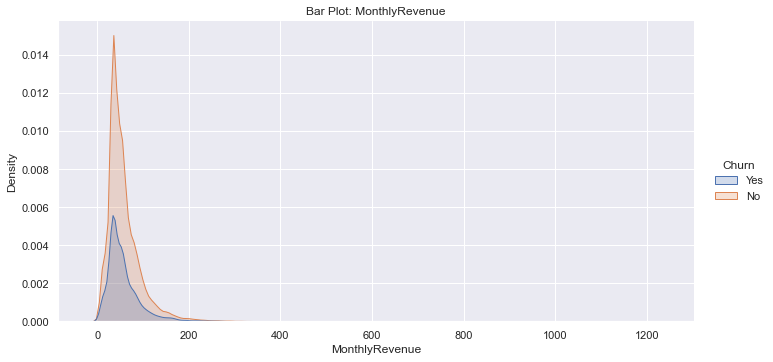

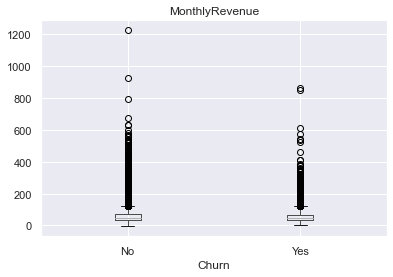

<AxesSubplot:title={'center':'MonthlyMinutes'}, xlabel='Churn'>

Text(0.5, 0.98, '')

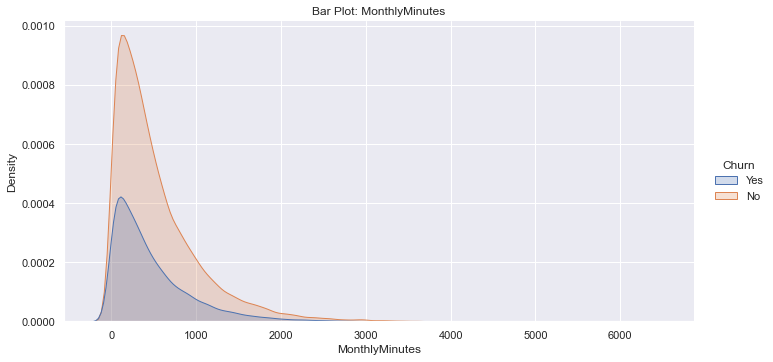

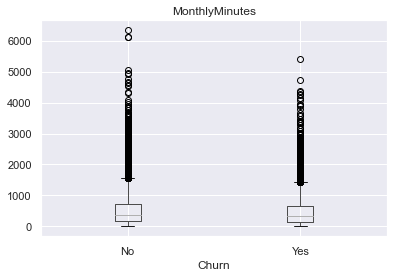

<AxesSubplot:title={'center':'TotalRecurringCharge'}, xlabel='Churn'>

Text(0.5, 0.98, '')

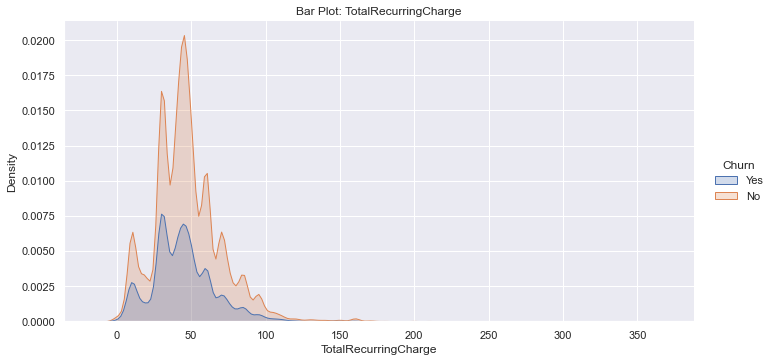

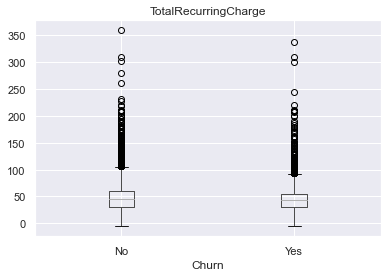

<AxesSubplot:title={'center':'DirectorAssistedCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

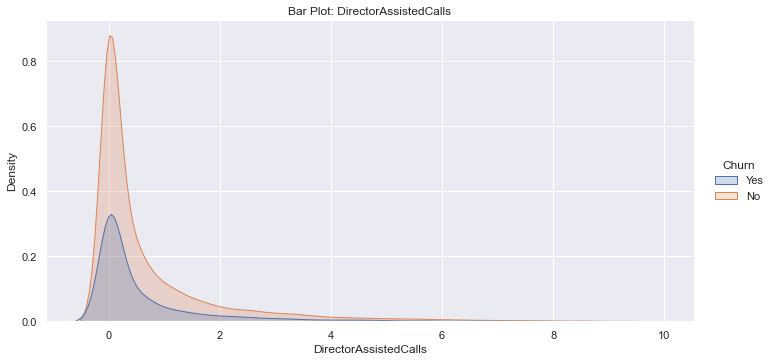

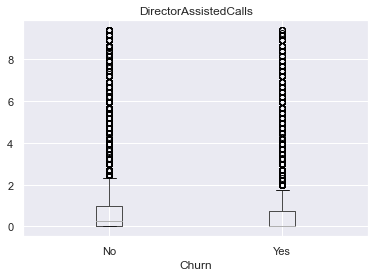

<AxesSubplot:title={'center':'OverageMinutes'}, xlabel='Churn'>

Text(0.5, 0.98, '')

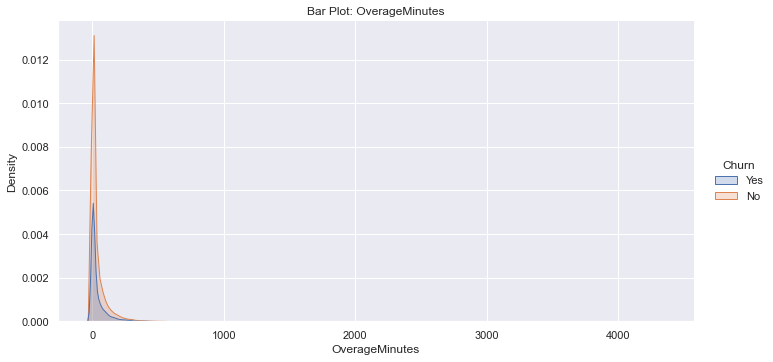

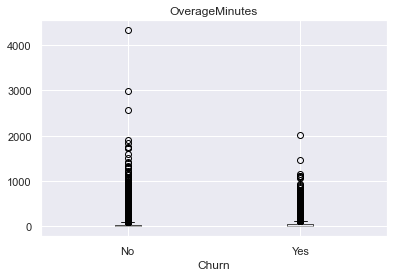

<AxesSubplot:title={'center':'RoamingCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

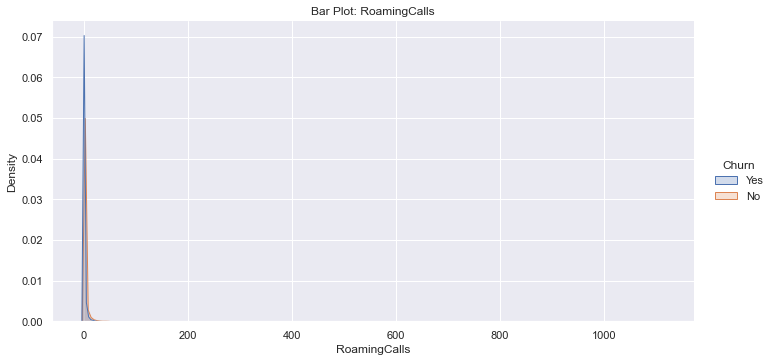

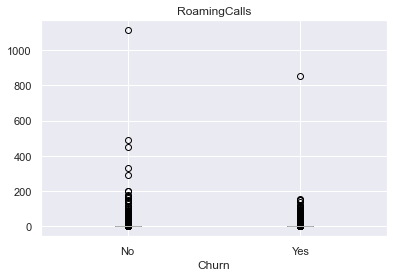

<AxesSubplot:title={'center':'PercChangeMinutes'}, xlabel='Churn'>

Text(0.5, 0.98, '')

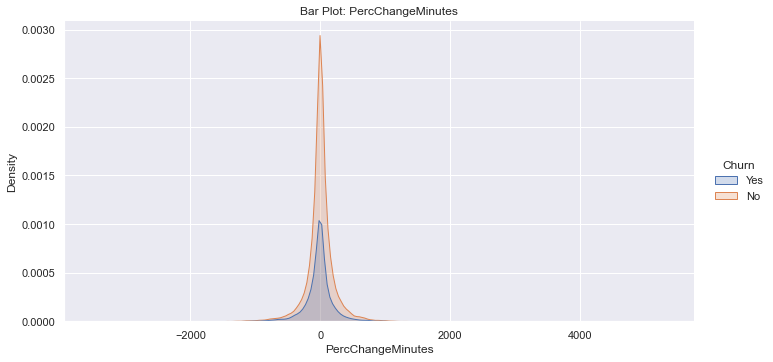

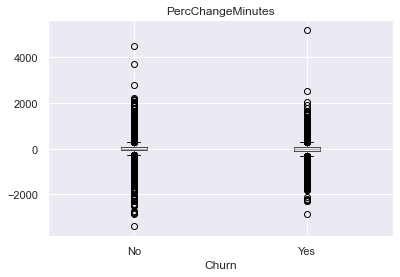

<AxesSubplot:title={'center':'PercChangeRevenues'}, xlabel='Churn'>

Text(0.5, 0.98, '')

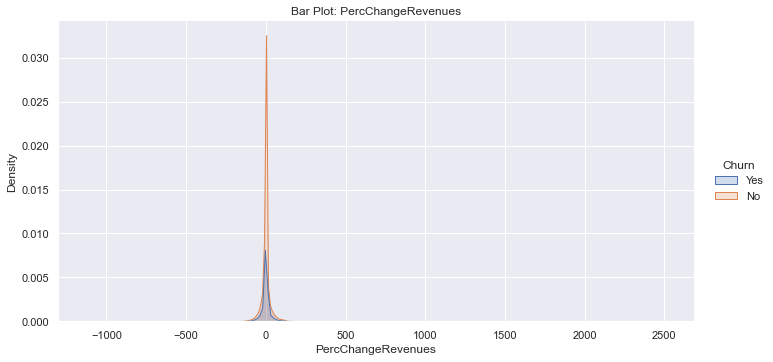

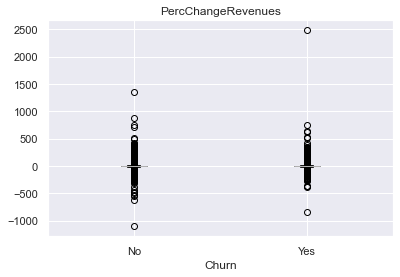

<AxesSubplot:title={'center':'DroppedCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

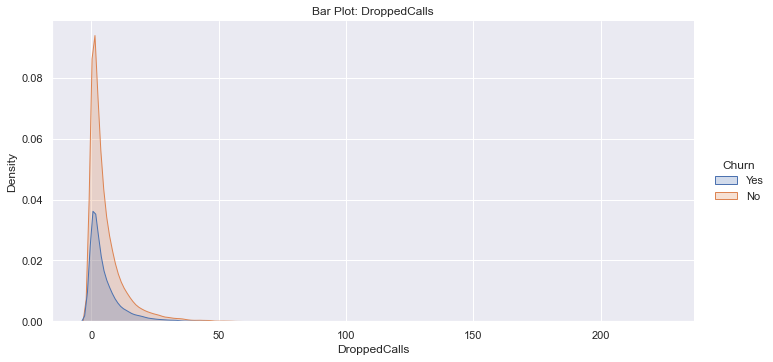

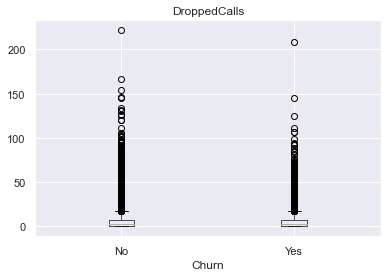

<AxesSubplot:title={'center':'BlockedCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

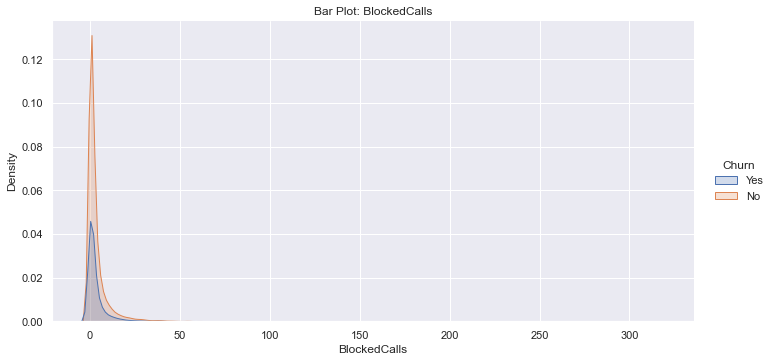

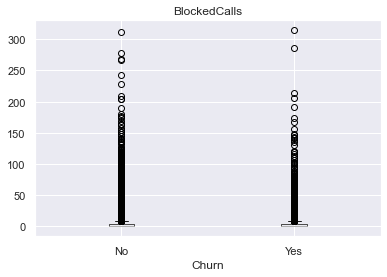

<AxesSubplot:title={'center':'UnansweredCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

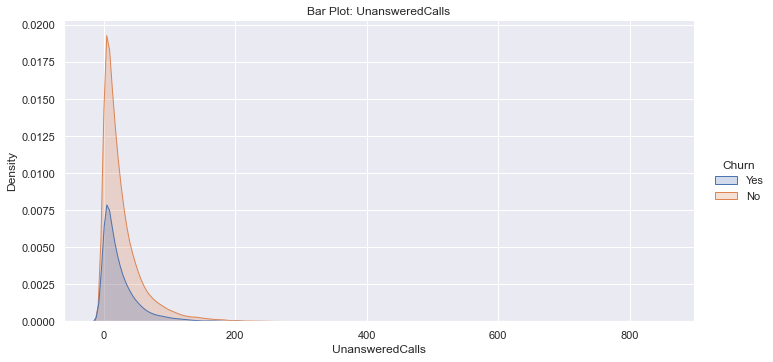

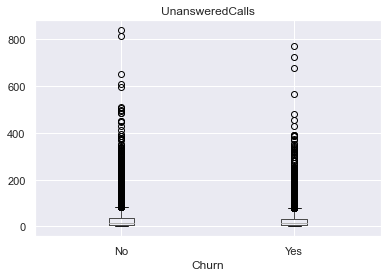

<AxesSubplot:title={'center':'CustomerCareCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

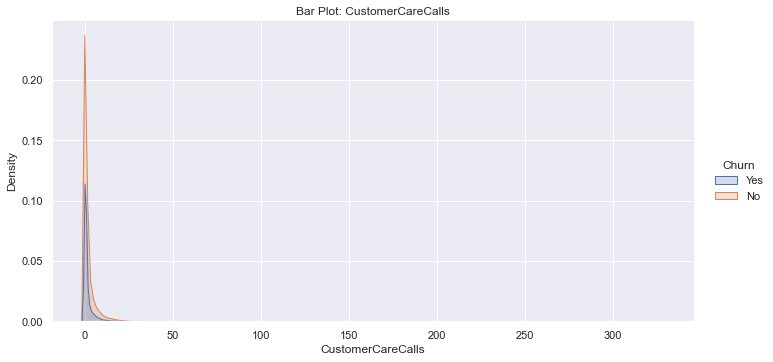

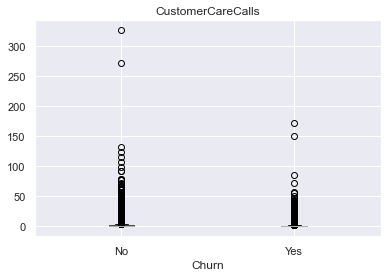

<AxesSubplot:title={'center':'ThreewayCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

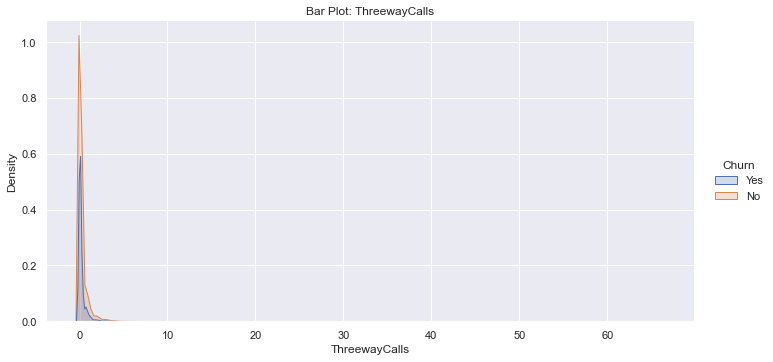

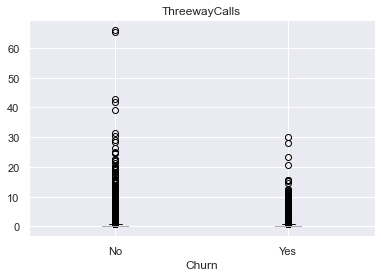

<AxesSubplot:title={'center':'ReceivedCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

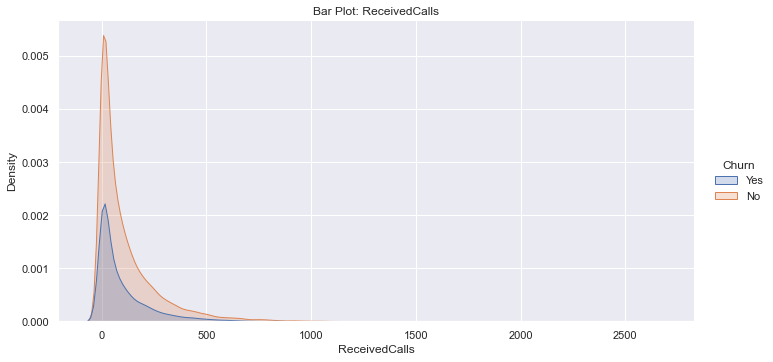

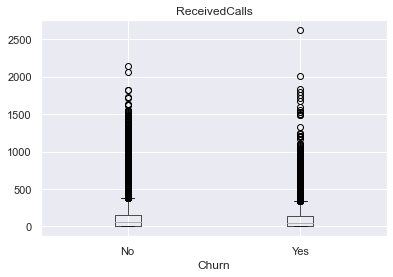

<AxesSubplot:title={'center':'OutboundCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

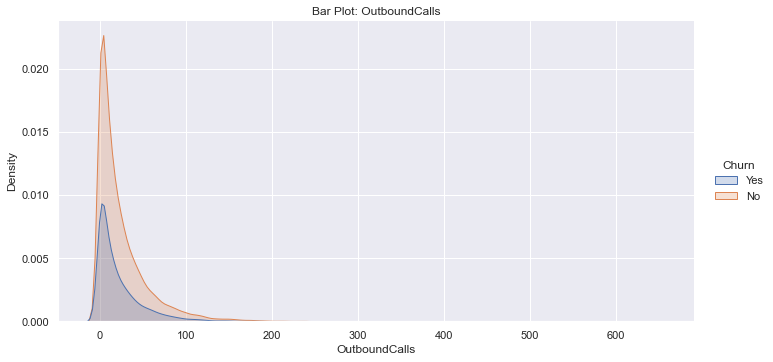

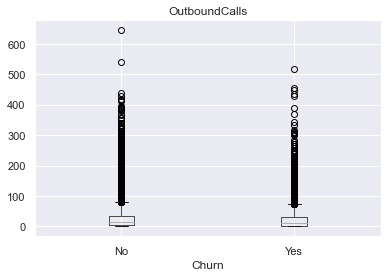

<AxesSubplot:title={'center':'InboundCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

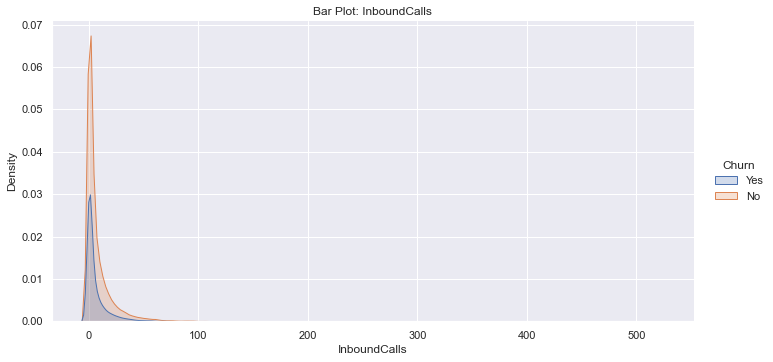

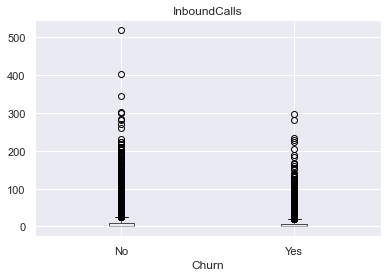

<AxesSubplot:title={'center':'PeakCallsInOut'}, xlabel='Churn'>

Text(0.5, 0.98, '')

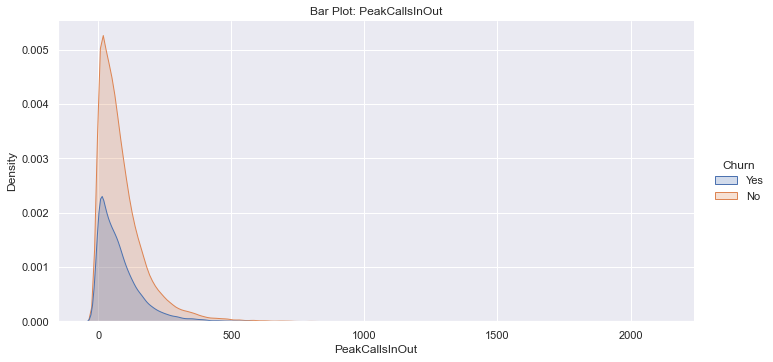

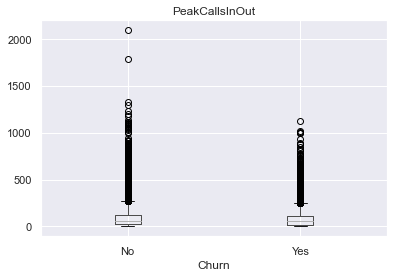

<AxesSubplot:title={'center':'OffPeakCallsInOut'}, xlabel='Churn'>

Text(0.5, 0.98, '')

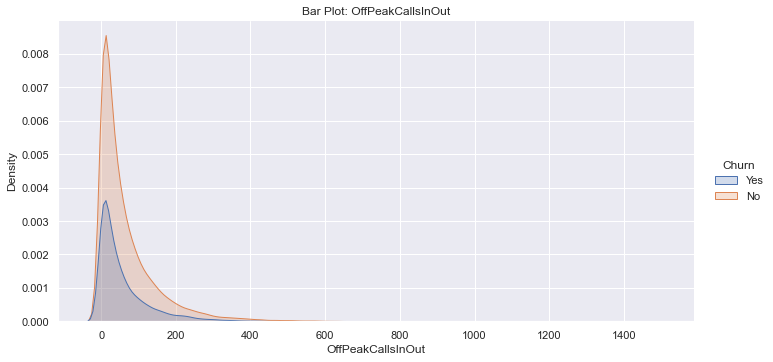

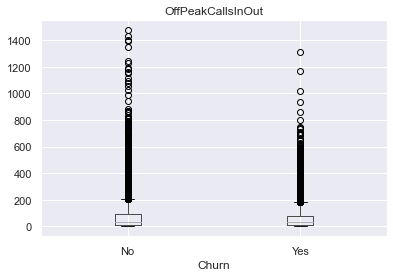

<AxesSubplot:title={'center':'DroppedBlockedCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

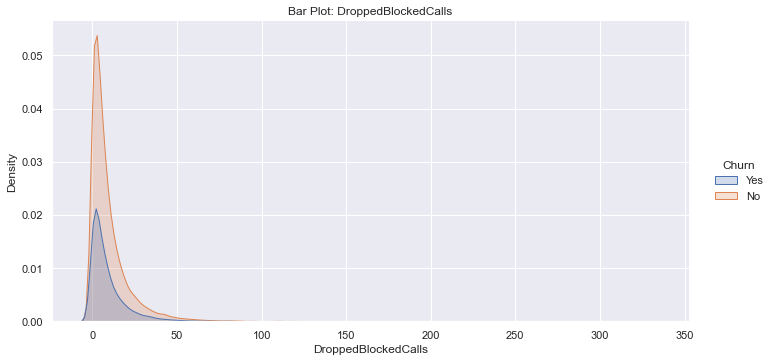

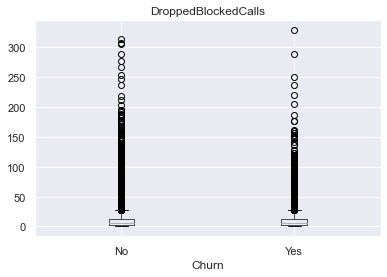

<AxesSubplot:title={'center':'CallForwardingCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

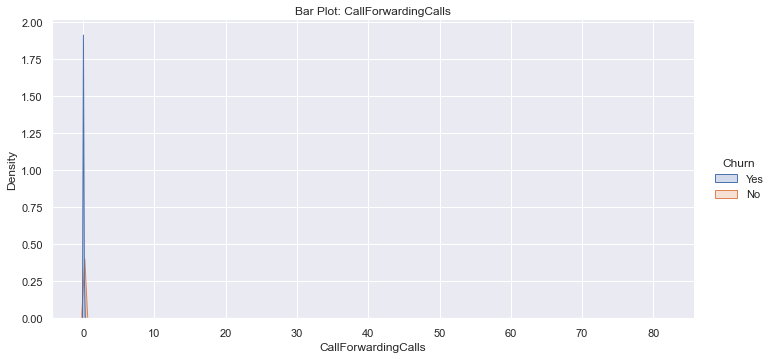

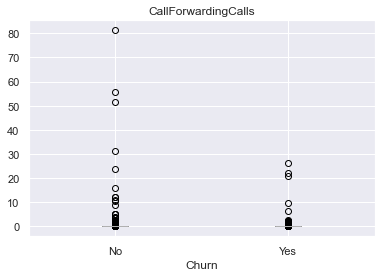

<AxesSubplot:title={'center':'CallWaitingCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

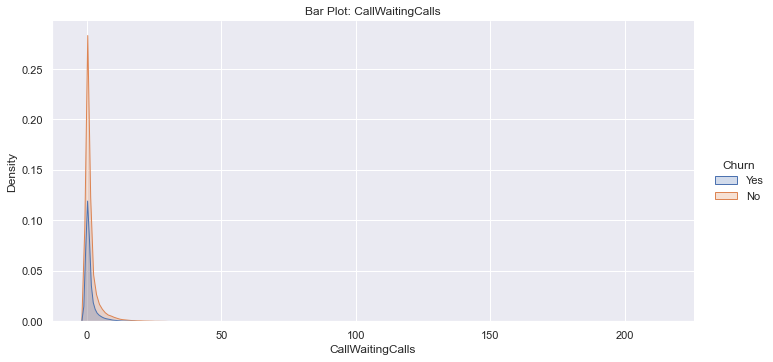

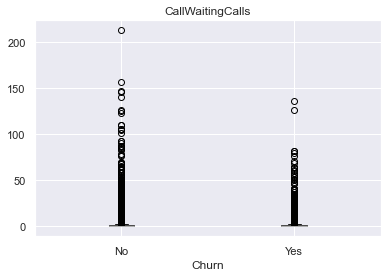

<AxesSubplot:title={'center':'MonthsInService'}, xlabel='Churn'>

Text(0.5, 0.98, '')

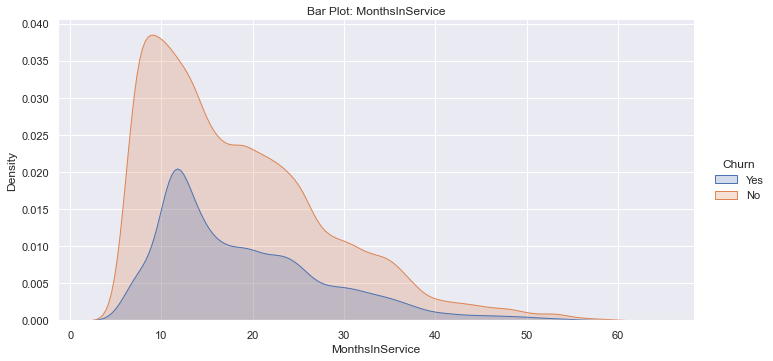

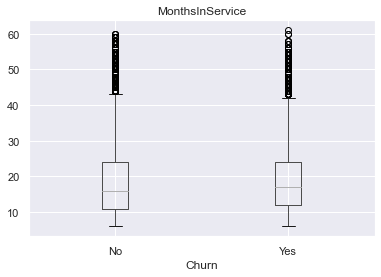

<AxesSubplot:title={'center':'UniqueSubs'}, xlabel='Churn'>

Text(0.5, 0.98, '')

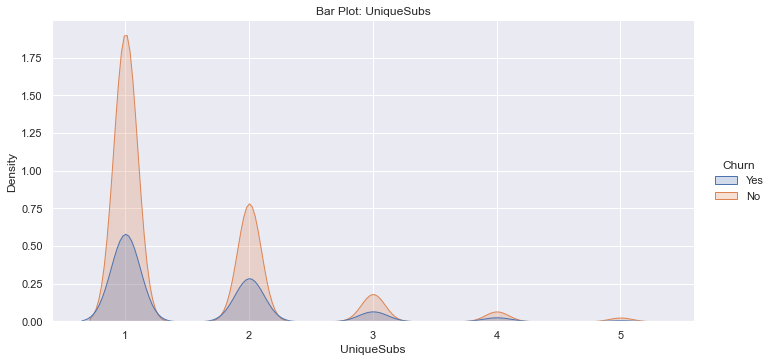

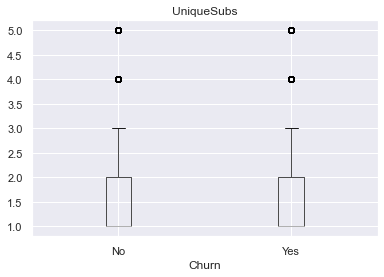

<AxesSubplot:title={'center':'ActiveSubs'}, xlabel='Churn'>

Text(0.5, 0.98, '')

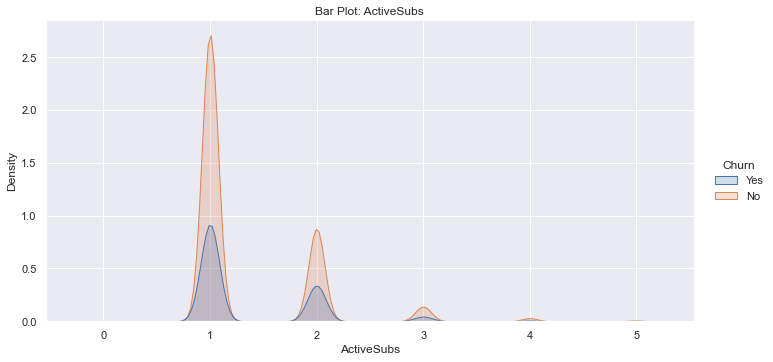

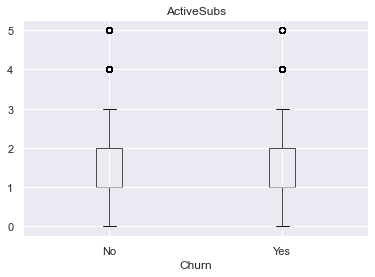

<AxesSubplot:title={'center':'Handsets'}, xlabel='Churn'>

Text(0.5, 0.98, '')

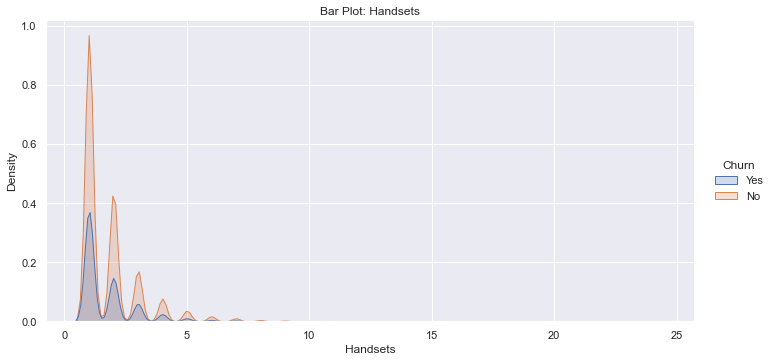

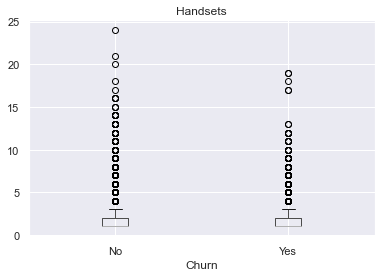

<AxesSubplot:title={'center':'HandsetModels'}, xlabel='Churn'>

Text(0.5, 0.98, '')

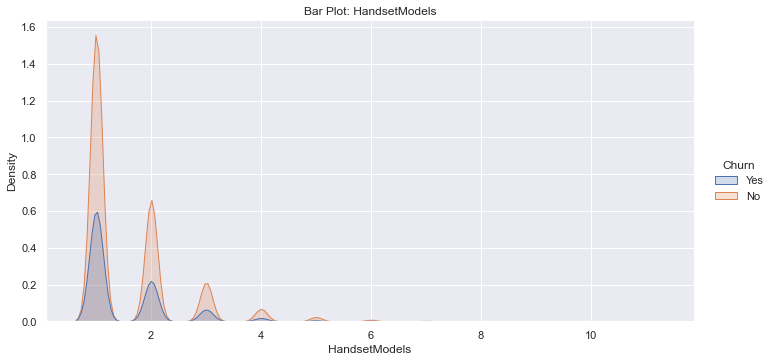

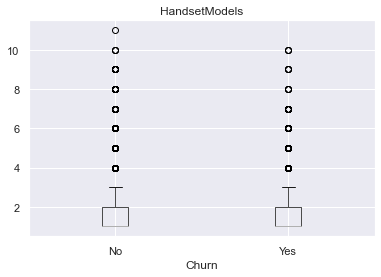

<AxesSubplot:title={'center':'CurrentEquipmentDays'}, xlabel='Churn'>

Text(0.5, 0.98, '')

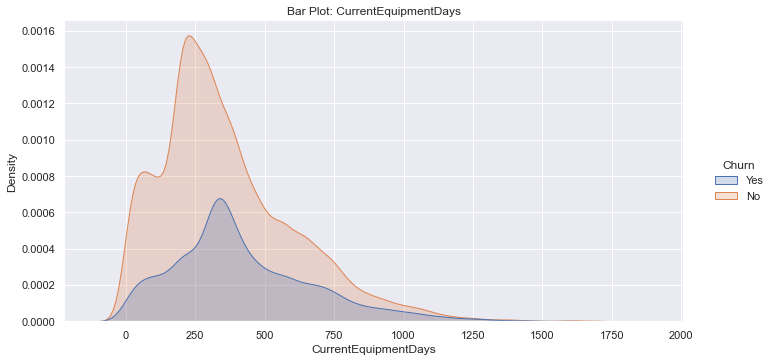

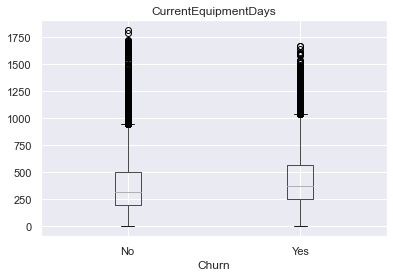

<AxesSubplot:title={'center':'AgeHH1'}, xlabel='Churn'>

Text(0.5, 0.98, '')

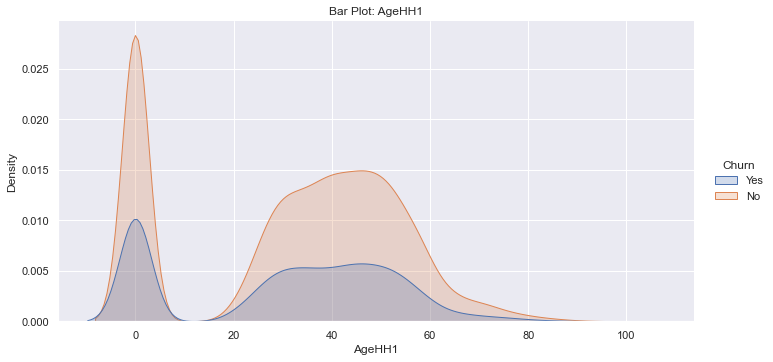

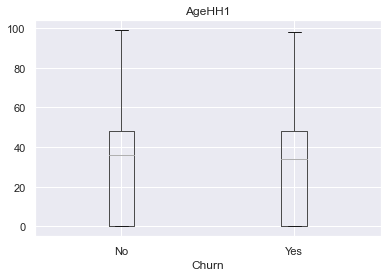

<AxesSubplot:title={'center':'AgeHH2'}, xlabel='Churn'>

Text(0.5, 0.98, '')

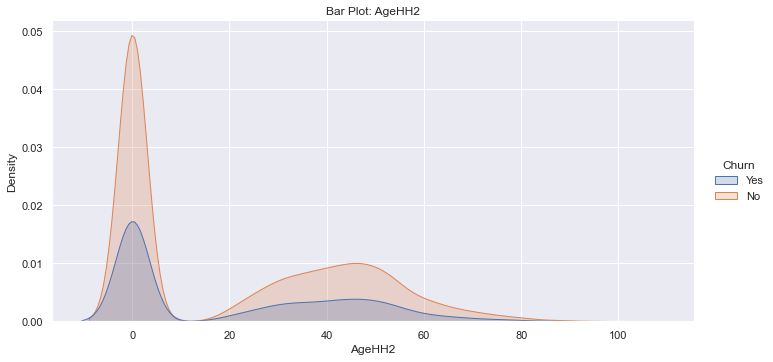

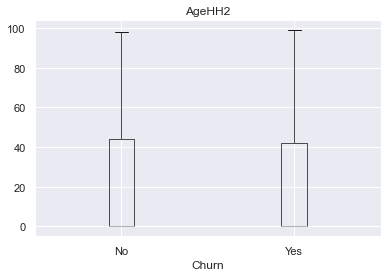

<AxesSubplot:title={'center':'RetentionCalls'}, xlabel='Churn'>

Text(0.5, 0.98, '')

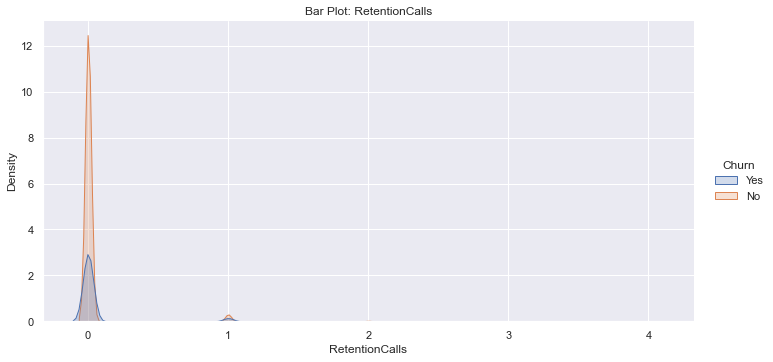

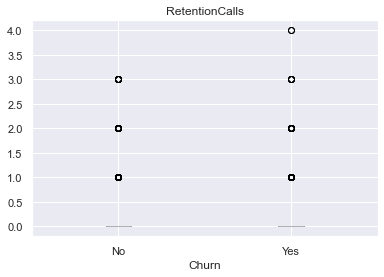

<AxesSubplot:title={'center':'RetentionOffersAccepted'}, xlabel='Churn'>

Text(0.5, 0.98, '')

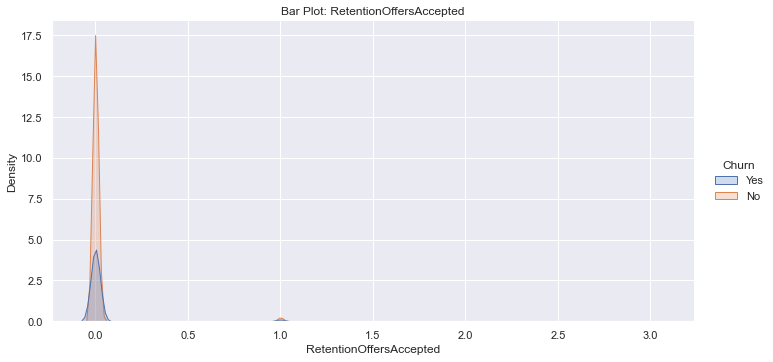

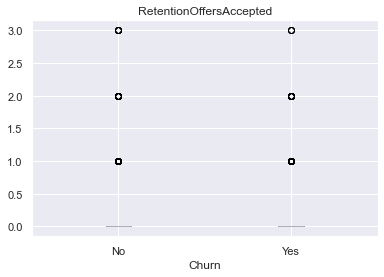

<AxesSubplot:title={'center':'ReferralsMadeBySubscriber'}, xlabel='Churn'>

Text(0.5, 0.98, '')

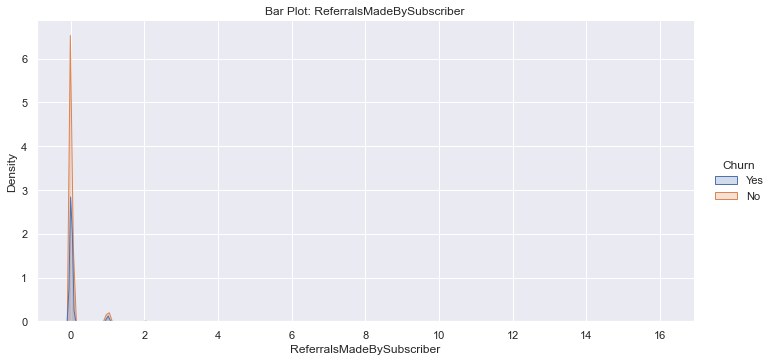

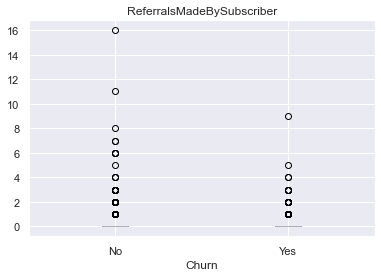

<AxesSubplot:title={'center':'IncomeGroup'}, xlabel='Churn'>

Text(0.5, 0.98, '')

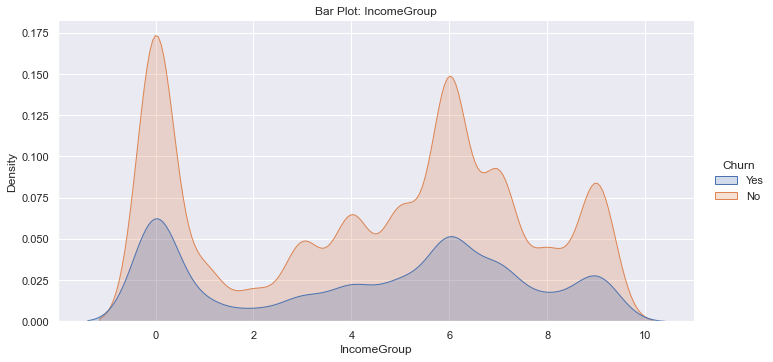

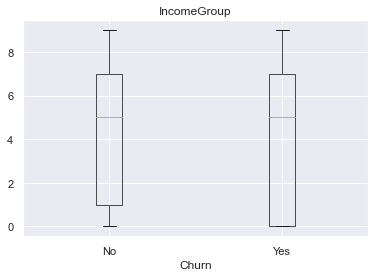

<AxesSubplot:title={'center':'AdjustmentsToCreditRating'}, xlabel='Churn'>

Text(0.5, 0.98, '')

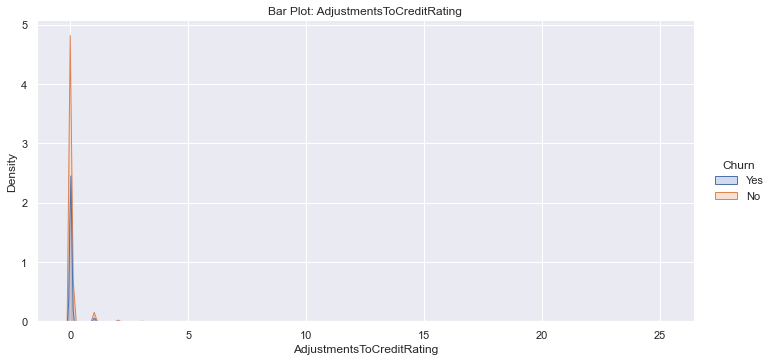

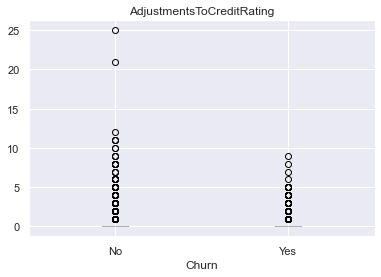

In [26]:

for col in numeric_features:
    #fig, ax = plt.subplots(1,2, figsize=(12,6))
    
    sns.displot(data=cust_df, x=col, hue='Churn', kind='kde', fill=True, aspect=2)\
    .set(title='Bar Plot: ' + col)
    
    cust_df.boxplot(column=col, by='Churn')
    plt.suptitle('')
    plt.show();

We have plotted bar plots and box plots for each numeric variable to illustrate what appears to be very proportional 'Churn - Yes' and 'Churn - No' relationships in terms of density across all numeric data.

## Q3. Create additional features to help predict churn

In [27]:
#wrapper function to create additional features for churn prediction
def create_features(df):
    
    #3.1 Percent of current active subs over total subs
    df['perc_active_subs'] = df['ActiveSubs'] / df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    df['perc_recurrent_charge']= df['TotalRecurringCharge'] / df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    df['perc_overage_mins']= df['OverageMinutes'] / df['MonthlyMinutes']
    
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    #3.4 Regroup credit rating into two bins - low and high
    df['credit_rating'] = df['CreditRating'].astype(str).str[0]
    df['credit_rating'] = df['credit_rating'].astype(int)
    df['credit_rating_new'] = df.apply(lambda x: 'high' if x.credit_rating <=3 else 'low', axis=1)
    return df  


In [28]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df.dropna(how='any', inplace=True)

In [29]:
# List for categorical and numeric features after removal

categorical_features_1 = ['ChildrenInHH','HandsetRefurbished', 'HandsetWebCapable', 
                          'TruckOwner', 'Homeownership', 'BuysViaMailOrder', 
                          'RespondsToMailOffers', 'OwnsComputer', 'HasCreditCard', 
                          'NewCellphoneUser', 'NotNewCellphoneUser','MadeCallToRetentionTeam', 
                          'credit_rating_new', 'PrizmCode', 'MaritalStatus']

numeric_features_1 = ['perc_active_subs', 'perc_recurrent_charge', 'perc_overage_mins',
                      'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                      'OverageMinutes', 'DirectorAssistedCalls', 'RoamingCalls', 
                      'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 
                      'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                      'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                      'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                      'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 
                      'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
                      'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 
                      'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 
                      'IncomeGroup', 'AdjustmentsToCreditRating']

label = ['churn']

print('Numbers of categorical features after removal= ',len(categorical_features_1))
print('Numbers of numeric features after removal= ',len(numeric_features_1))

Numbers of categorical features after removal=  15
Numbers of numeric features after removal=  37


After removal = 52 variables remaining (15 Cat, 37 Num)

The 52 variables are derived from the removal of 'RVOwner','OptOutMailings','NonUSTravel','OwnsMotorcycle','Occupation' and 'HandsetPrice' from the initial list of categorical variables, and the addition of the 3 new numeric variables.



# 3.1 Correlation Analysis.

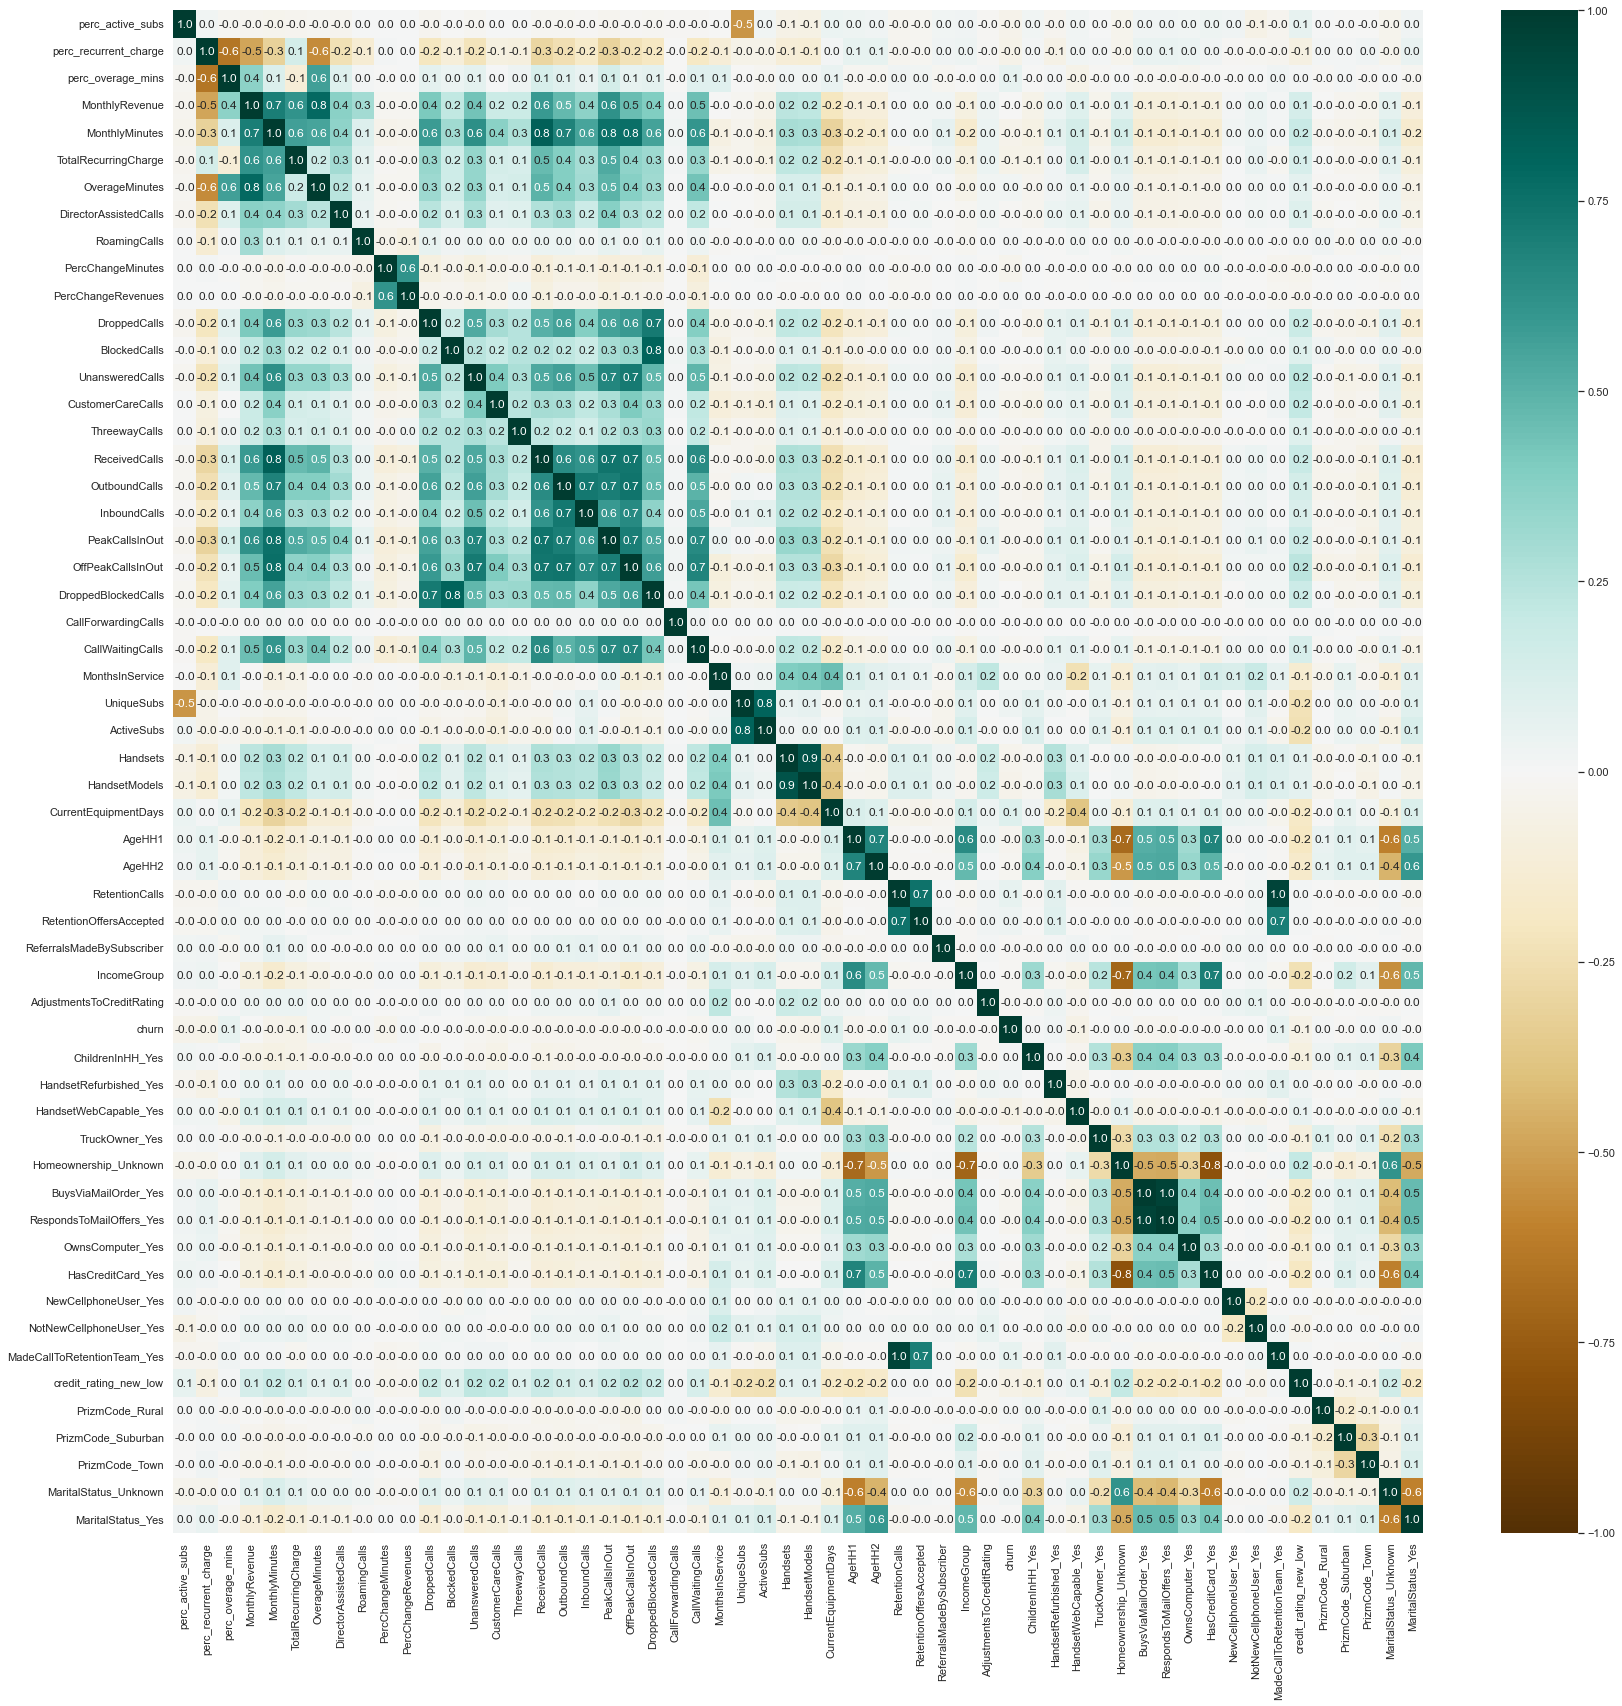

In [30]:
# heatmap dataframe
df_hm = cust_df[categorical_features_1 + numeric_features_1 + label]

# Create dummy variables for all categorical variables
df_hm = pd.get_dummies(df_hm, drop_first=True)

# heatmap
plt.figure(figsize=(28,28))
sns.heatmap(df_hm.corr(), annot=True, fmt='.1f', cmap='BrBG', vmin=-1, vmax=1)
plt.show();

In [31]:
# List out pair variables with correlation > 0.7

df_corr = df_hm.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().reset_index()
df_corr.columns = ['variables1', 'variables2', 'correlation']
df_corr[1:][df_corr.correlation > 0.7]

variables1                   variables2  correlation
1   RespondsToMailOffers_Yes         BuysViaMailOrder_Yes     0.967635
2             RetentionCalls  MadeCallToRetentionTeam_Yes     0.956540
3              HandsetModels                     Handsets     0.887145
4              ReceivedCalls               MonthlyMinutes     0.821671
5               BlockedCalls          DroppedBlockedCalls     0.811733
6                 ActiveSubs                   UniqueSubs     0.806604
7      Homeownership_Unknown            HasCreditCard_Yes     0.792484
8             OverageMinutes               MonthlyRevenue     0.783604
9             MonthlyMinutes            OffPeakCallsInOut     0.760519
10            MonthlyMinutes               PeakCallsInOut     0.755379
11            RetentionCalls      RetentionOffersAccepted     0.749773
12            PeakCallsInOut                ReceivedCalls     0.737967
13         OffPeakCallsInOut                OutboundCalls     0.737492
14             ReceivedCalls            OffPeakCallsInOut     0.732543
15              InboundCalls                OutboundCalls     0.723826
16              DroppedCalls          DroppedBlockedCalls     0.716278
17               IncomeGroup        Homeownership_Unknown     0.712854
18           UnansweredCalls            OffPeakCallsInOut     0.711614
19             OutboundCalls               PeakCallsInOut     0.700960

To help improve the prediction model outcome, the Heatmap helps to visualize any predictor variables that are correlated. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity. In listing all highly correlated variables > 0.7, we decided that the following 15 categorical and numeric variables can be made redundant and thus dropped due to multicolinearlity:

- 'BuysViaMailOrder'
- 'MadeCallToRetentionTeam'
- 'HandsetModels'
- 'MonthlyMinutes'
- 'BlockedCalls'
- 'UniqueSubs'
- 'Homeownership'
- 'OverageMinutes'
- 'RetentionOffersAccepted'
- 'PeakCallsInOut'
- 'OutboundCalls'
- 'OffPeakCallsInOut'
- 'InboundCalls'
- 'DroppedCalls'
- 'UnansweredCalls'


In [32]:
# Recompile list for categorical and numeric features prior to machine learning

categorical_features_test = ['ChildrenInHH','HandsetRefurbished', 'HandsetWebCapable', 
                             'TruckOwner', 'RespondsToMailOffers', 'OwnsComputer', 
                             'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'credit_rating_new', 
                             'PrizmCode', 'MaritalStatus']

numeric_features_test = ['perc_active_subs', 'perc_recurrent_charge', 'perc_overage_mins', 
                         'MonthlyRevenue', 'TotalRecurringCharge', 'DirectorAssistedCalls', 
                         'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 
                         'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 
                         'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 
                         'MonthsInService', 'ActiveSubs', 'Handsets', 
                         'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 
                         'ReferralsMadeBySubscriber', 'IncomeGroup', 
                         'AdjustmentsToCreditRating']

print('Numbers of categorical features for machine learning = ',len(categorical_features_test))
print('Numbers of numeric features for machine learning = ',len(numeric_features_test))

Numbers of categorical features for machine learning =  12
Numbers of numeric features for machine learning =  25


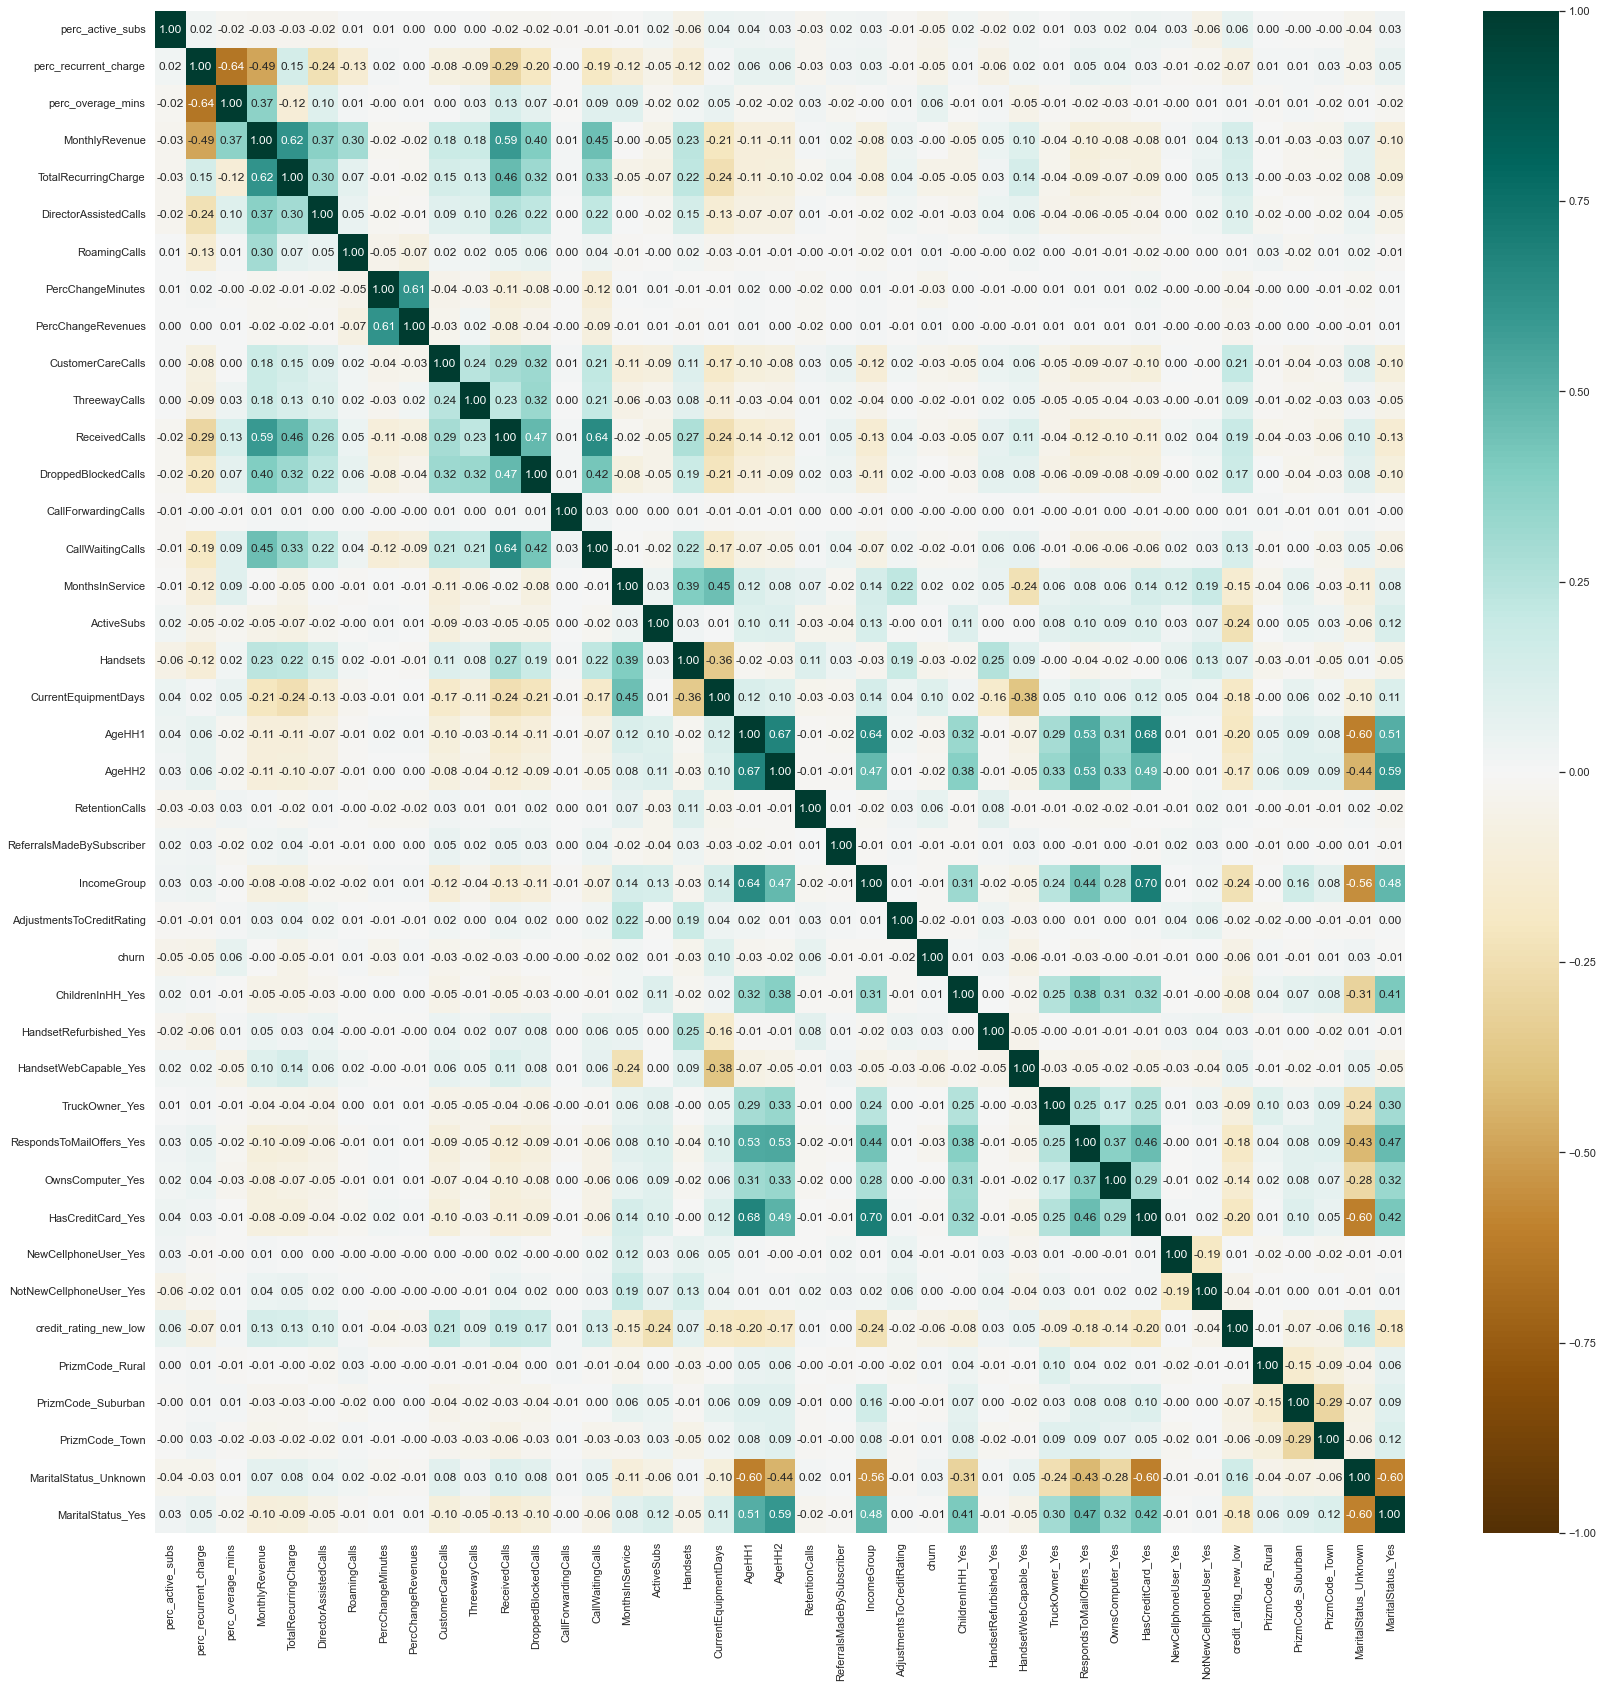

In [33]:
# Redraw heatmap with reduced variables to confirm zero multicolinearlity

# heatmap dataframe
df_hm1 = cust_df[categorical_features_test + numeric_features_test + label]

# Create dummy variables for all categorical variables
df_hm1 = pd.get_dummies(df_hm1, drop_first=True)

# heatmap
plt.figure(figsize=(28,28))
sns.heatmap(df_hm1.corr(), annot=True, fmt='.2f', cmap='BrBG', vmin=-1, vmax=1)
plt.show();

In [34]:
df_corr = df_hm1.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().reset_index()
df_corr.columns = ['variables1', 'variables2', 'correlation']

print("Number of pair variables with correlation of > 0.7 =", df_corr[1:][df_corr.correlation > 0.7]['correlation'].count())

Number of pair variables with correlation of > 0.7 = 0


All variables correlation are < 0.7.

From the initial count of 57 (23 Cat, 34 Num) variables, 21 variables were removed through (i) the EDA process and (ii) due to high correlation. 

As such, the total variables we have derived for testing is 37 (12 Cat, 25 Num)

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [35]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [36]:
#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

len_num = len(numeric_features_test)

X = cust_df[numeric_features_test + categorical_features_test]
y = cust_df['churn']

# Split training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Make a copy of the X_test
X_test_copy = X_test.copy()

#Feature scaling for all continuous variable
sc = StandardScaler().fit(X.iloc[:,:len_num])
X_train.iloc[:,:len_num] = sc.transform(X_train.iloc[:,:len_num])
X_test.iloc[:,:len_num] = sc.transform(X_test.iloc[:,:len_num])

# Create dummy variables for all categorical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [37]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set

LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.72      0.99      0.83     10362
           1       0.55      0.02      0.04      4150

    accuracy                           0.72     14512
   macro avg       0.63      0.51      0.44     14512
weighted avg       0.67      0.72      0.61     14512



<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

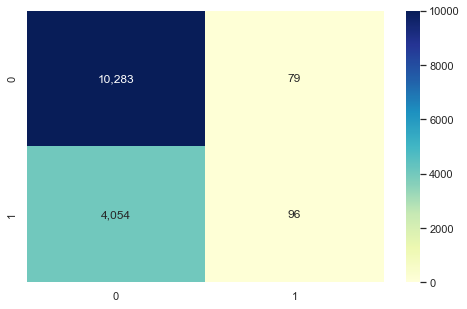

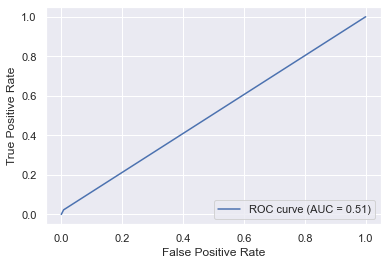

Gini: 0.009, Max. Gini: 0.357, Normalized Gini: 0.026


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_pred_LR = LR_model.predict(X_test)

result_LR = metrics.classification_report(y_test, y_pred_LR, output_dict=True)
print(metrics.classification_report(y_test, y_pred_LR))

# Confusion matrix
confusion_LR = metrics.confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_LR, annot=True, fmt=',', cmap='YlGnBu', vmin=0, vmax=10000)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_LR)
roc_auc_LR = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_LR, estimator_name='ROC curve')
display.plot()
plt.show()

# Gini 
gini_predictions_LR = gini(y_test, y_pred_LR)
gini_max_LR = gini(y_test, y_test)
ngini_LR = gini_normalized(y_test, y_pred_LR)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_LR, gini_max_LR, ngini_LR))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [39]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set

RF_model = RandomForestClassifier(random_state=0)
RF_model.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

              precision    recall  f1-score   support

           0       0.72      0.98      0.83     10362
           1       0.50      0.06      0.11      4150

    accuracy                           0.71     14512
   macro avg       0.61      0.52      0.47     14512
weighted avg       0.66      0.71      0.62     14512



<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

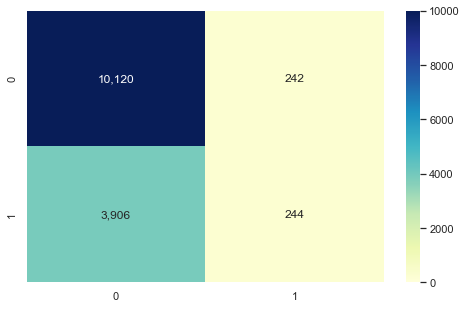

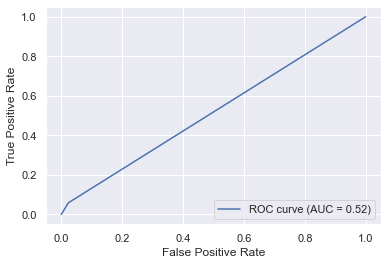

Gini: 0.017, Max. Gini: 0.357, Normalized Gini: 0.047


In [40]:

#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_pred_RF = RF_model.predict(X_test)

result_RF = metrics.classification_report(y_test, y_pred_RF, output_dict=True)
print(metrics.classification_report(y_test, y_pred_RF))

# Confusion matrix
confusion_RF = metrics.confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_RF, annot=True, fmt=',', cmap='YlGnBu', vmin=0, vmax=10000)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF)
roc_auc_RF = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_RF, estimator_name='ROC curve')
display.plot()
plt.show()

# Gini 
gini_predictions_RF = gini(y_test, y_pred_RF)
gini_max_RF = gini(y_test, y_test)
ngini_RF = gini_normalized(y_test, y_pred_RF)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_RF, gini_max_RF, ngini_RF))

Results:
- Although the Random Forest Classifier model shows better results of 0.06 recall vs 0.01 recall, and 0.017 Gini vs 0.09 Gini respectively compared to the Logistic Regression model, the outcome is poor and too unstable to make an accurate prediction. The AUC score for the Random Forest is only 0.52 and the F1-score is at 0.51. 
- One probable reason is the Class imbalance of data, a phenomenon we noticed during the EDA phase. Class imbalance is a scenario that arises when there is unequal distribution of class in a dataset i.e. the no. of data points in the negative class (No Churn - majority class) is very large compared to that of the positive class (Churn - minority class).
- If the imbalanced data is not treated beforehand, it will continue to degrade the performance of the classifier model. Predictions will overwhelmingly correspond to the majority class (No churn) and treat the minority class (Churn) features as noise in the data that can be ignored. This produces results with high bias as observed in both Logistic Regression & Random Forest Classifier models above.
- To address this bias, our team decided to implement a Resampling technique where synthetic samples are generated for the minority class (Churn). The purpose of this is to alleviate the overfitting problem posed by class imbalance through random oversampling. By interpolating positive instances that lie together, new instances are generated, thus rebalancing the skew.
- The Resampling technique we settled on is the SMOTE (Synthetic Minority Oversampling Technique) + the ENN algoithm method. Upon application, new X_train and y_train data will be generated to feed the revised Random Forest classifer model.
- Additionally, to further optimise and define our final models, we applied hyperparameters tuning that was compatible with the Random Forest Classifier with SMOTE + ENN model, but not the Logistic Regression with SMOTE + ENN model.

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.79      0.46      0.58     10362
           1       0.34      0.69      0.45      4150

    accuracy                           0.52     14512
   macro avg       0.56      0.57      0.52     14512
weighted avg       0.66      0.52      0.54     14512



<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

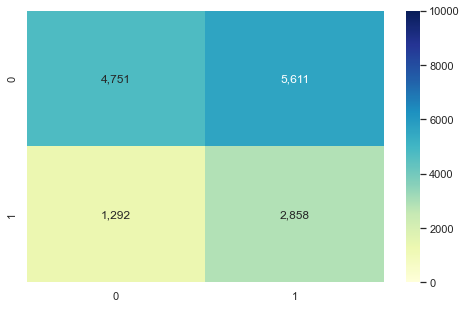

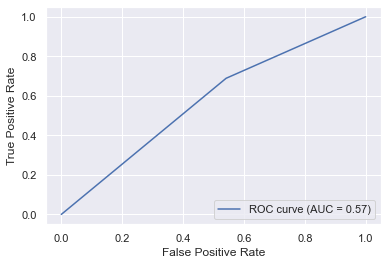

Gini: 0.055, Max. Gini: 0.357, Normalized Gini: 0.153


In [41]:
# Hybridization: SMOTE + ENN on Logistic Regression

from imblearn.combine import SMOTEENN

# Oversampling the telco dataset using SMOTE + ENN
smenn=SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

# Build Logistic Regression classifier model on training data set on oversampling dataset
LR_model_smenn = LogisticRegression(random_state=0)
LR_model_smenn.fit(X_train_smenn, y_train_smenn)

#type your code here to predict for X_test data set using the fitted RF model
y_pred_LR_smenn = LR_model_smenn.predict(X_test)

# Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
result_LR_SM = metrics.classification_report(y_test, y_pred_LR_smenn, output_dict=True)
print(metrics.classification_report(y_test, y_pred_LR_smenn))

# Confusion matrix
confusion_LR = metrics.confusion_matrix(y_test, y_pred_LR_smenn)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_LR, annot=True, fmt=',', cmap='YlGnBu', vmin=0, vmax=10000)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_LR_smenn)
roc_auc_LR_SM = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_LR_SM, estimator_name='ROC curve')
display.plot()
plt.show()

# Gini
gini_predictions_LR_SM = gini(y_test, y_pred_LR_smenn)
gini_max_LR_SM = gini(y_test, y_test)
ngini_LR_SM = gini_normalized(y_test, y_pred_LR_smenn)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_LR_SM, gini_max_LR_SM, ngini_LR_SM))


In [42]:
# Hybridization: Hyperparameters with SMOTE + ENN on Random Forest

# Build random forest classifier model on training data set on oversampling dataset
RF_model_smenn = RandomForestClassifier(random_state=0)
RF_model_smenn.fit(X_train_smenn, y_train_smenn)

RandomForestClassifier(random_state=0)

In [43]:
# Hyperparameters Tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state= 101).fit(X_train,y_train)
predictionforest = model.predict(X_test)

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 2, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train_smenn, y_train_smenn)

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, model.best_params_['n_estimators'] + 150]
}

print(grid_search)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

{'criterion': ['gini'], 'max_depth': [1200], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [11, 14, 17], 'n_estimators': [117, 167, 267, 367, 417]}


              precision    recall  f1-score   support

           0       0.85      0.34      0.48     10362
           1       0.34      0.85      0.48      4150

    accuracy                           0.48     14512
   macro avg       0.59      0.59      0.48     14512
weighted avg       0.70      0.48      0.48     14512



<Figure size 576x360 with 0 Axes>

<AxesSubplot:>

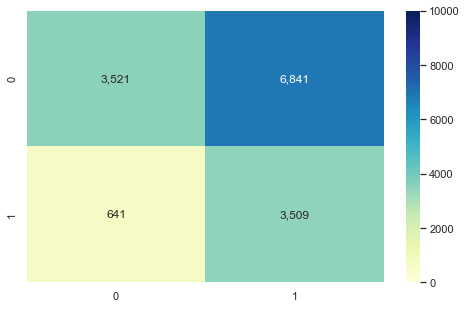

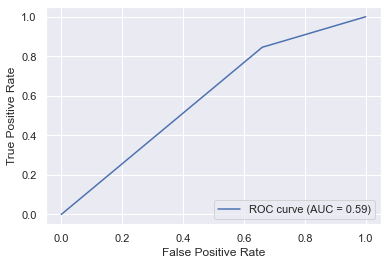

Gini: 0.069, Max. Gini: 0.357, Normalized Gini: 0.193


In [44]:
#type your code here to predict for X_test data set using the fitted RF model
y_pred_RF_smenn = model.best_estimator_.predict(X_test)

# Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix
result_RF_SM = metrics.classification_report(y_test, y_pred_RF_smenn, output_dict=True)
print(metrics.classification_report(y_test, y_pred_RF_smenn))

# Confusion matrix
confusion_RF = metrics.confusion_matrix(y_test, y_pred_RF_smenn)
plt.figure(figsize=(8,5))
sns.heatmap(confusion_RF, annot=True, fmt=',', cmap='YlGnBu', vmin=0, vmax=10000)

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RF_smenn)
roc_auc_RF_SM = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_RF_SM, estimator_name='ROC curve')
display.plot()
plt.show()

# Gini
gini_predictions_RF_SM = gini(y_test, y_pred_RF_smenn)
gini_max_RF_SM = gini(y_test, y_test)
ngini_RF_SM = gini_normalized(y_test, y_pred_RF_smenn)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions_RF_SM, gini_max_RF_SM, ngini_RF_SM))

In [45]:
# Result Summary

df_result_LR = [result_LR['1']['precision'], result_LR['1']['recall'], 
 result_LR['1']['f1-score'], result_LR['accuracy'], roc_auc_LR, gini_predictions_LR]

df_result_RF = [result_RF['1']['precision'], result_RF['1']['recall'], 
 result_RF['1']['f1-score'], result_RF['accuracy'], roc_auc_RF, gini_predictions_RF]

df_result_LR_SM = [result_LR_SM['1']['precision'], result_LR_SM['1']['recall'], 
 result_LR_SM['1']['f1-score'], result_LR_SM['accuracy'], roc_auc_LR_SM, gini_predictions_LR_SM]

df_result_RF_SM = [result_RF_SM['1']['precision'], result_RF_SM['1']['recall'], 
 result_RF_SM['1']['f1-score'], result_RF_SM['accuracy'], roc_auc_RF_SM, gini_predictions_RF_SM]

df_result = pd.DataFrame(list(zip(df_result_LR, df_result_RF, df_result_LR_SM, df_result_RF_SM)), 
                        columns =['Logistic Regression', 'Random Forest','LR with SMOTE', 'RF with SMOTE & Hyperparameters Tuning'])
df_result.rename(index={0: 'Precision', 1: 'Recall', 2: 'f1-score', 3: 'accuracy', 4: 'AUC', 5: 'Gini'}).round(2)

Logistic Regression  Random Forest  LR with SMOTE  \
Precision                 0.55           0.50           0.34   
Recall                    0.02           0.06           0.69   
f1-score                  0.04           0.11           0.45   
accuracy                  0.72           0.71           0.52   
AUC                       0.51           0.52           0.57   
Gini                      0.01           0.02           0.05   

           RF with SMOTE & Hyperparameters Tuning  
Precision                                    0.34  
Recall                                       0.85  
f1-score                                     0.48  
accuracy                                     0.48  
AUC                                          0.59  
Gini                                         0.07

<mark>__Result:__

 
After applying the SMOTE + ENN technique, the performance of both Logistic Regression and Random Forest models greatly improved in terms of Recall score, Gini coefficient and f1-score, contributing to the stabilization of the models. There was also a slight increase in AUC scores for both models. However, we noticed that Precision and Accuracy scores had decreased by 15-20%. Nonetheless, the team feels that the decrease in Precision can be negated by the overwhelming improvement in Recall and Gini scores (which are more important when calculating Churn rate).
    
When comparing results between Logistic Regression and Random Forest models without applying the SMOTE + ENN method, the Random Forest model performed better across all measurements besides Precision. After applying the SMOTE + ENN method and hyperparameters tuning, the Random Forest model again performed better than the Logistic Regression model in all areas besides Accuracy.
    
As such, we can definitively say that the best model to determine model accuracy is the 'Random Forest model paired with the SMOTE + ENN method and with Hyperparameters Tuning'.

### Q4.3 Identify most important features impacting churn

<AxesSubplot:title={'center':'Top 20 important features'}, ylabel='Gini importance'>

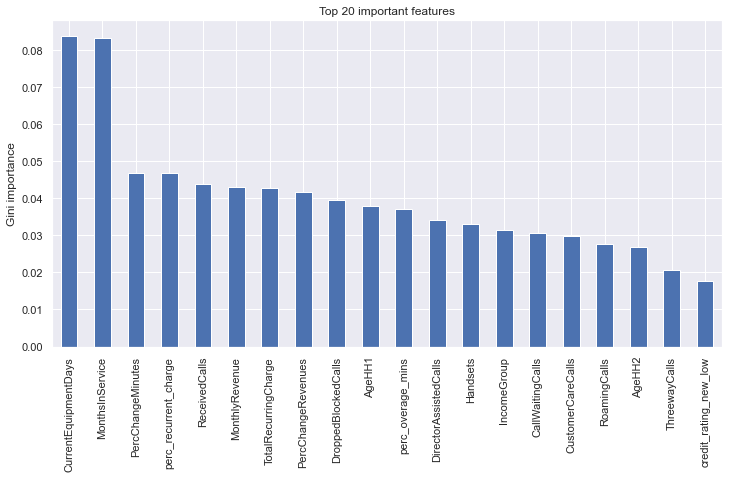

In [46]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

features_importance = pd.Series(RF_model_smenn.feature_importances_, 
                                index = X_train.columns)
features_importance.nlargest(20).plot(kind='bar', figsize=(12,6), 
                                                       title='Top 20 important features', 
                                                       ylabel='Gini importance')

In [47]:
features_importance.nlargest(20)


CurrentEquipmentDays     0.083778
MonthsInService          0.083344
PercChangeMinutes        0.046895
perc_recurrent_charge    0.046676
ReceivedCalls            0.043899
MonthlyRevenue           0.043015
TotalRecurringCharge     0.042730
PercChangeRevenues       0.041638
DroppedBlockedCalls      0.039404
AgeHH1                   0.037785
perc_overage_mins        0.037131
DirectorAssistedCalls    0.034048
Handsets                 0.033029
IncomeGroup              0.031542
CallWaitingCalls         0.030722
CustomerCareCalls        0.029883
RoamingCalls             0.027568
AgeHH2                   0.026935
ThreewayCalls            0.020588
credit_rating_new_low    0.017679
dtype: float64


The higher the Gini Importance number, the higher the impact of the feature. 

We have identified the top 20 features with the highest Gini Importance score. 

They are: 'MonthsInService',
'CurrentEquipmentDays',
'perc_recurrent_charge',
'PercChangeMinutes', 
'ReceivedCalls', 
'MonthlyRevenue',
'TotalRecurringCharge', 
'PercChangeRevenues', 
'AgeHH1',
'DroppedBlockedCalls', 
'DirectorAssistedCalls', 
'perc_overage_mins',
'Handsets', 
'IncomeGroup', 
'CallWaitingCalls', 
'CustomerCareCalls',
'AgeHH2', 
'RoamingCalls', 
'ThreewayCalls', 
'credit_rating_new_low'


## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [48]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object

holdout_df = pd.read_csv('Mini_project_3_Hold_Out_Data.csv')

#Make a call to the feature engineering wrapper function for churn prediction
holdout_df=create_features(holdout_df)

# Set Churn to 0 to avoid drop all the columns as nan
holdout_df.Churn = 0

# Drop nan row
holdout_df.dropna(how='any', inplace=True)

In [49]:
#Define columns to be included in X and y
# X = Independent variables
# Y = Dependent variable (churn flag)

#len_cat = len(categorical_features_test)
len_num = len(categorical_features_test)

X_hold_test = holdout_df[numeric_features_test + categorical_features_test]

#Feature scaling for all continuous variable
sc = StandardScaler().fit(X_hold_test.iloc[:,:len_num])
X_hold_test.iloc[:,:len_num] = sc.transform(X_hold_test.iloc[:,:len_num])

#Create dummy variables for all categorical variables
X_hold_test = pd.get_dummies(X_hold_test)


In [50]:
# Use "predict" function on the transformend data using the best fitted model object
y_hold_pred_RF = RF_model_smenn.predict(X_hold_test)

# Insert prediction into holdout_df
holdout_df.Churn = y_hold_pred_RF

print('Out of {:,} customers in the hold out data, \
the model predicted {:,} churners.'.format(holdout_df.shape[0], holdout_df.Churn.sum()))

Out of 19,252 customers in the hold out data, the model predicted 7,592 churners.


In [51]:
# Predicted churners

holdout_df[holdout_df['Churn']==1]

print('Using the Random Forest Classifier with SMOTE + ETN method, we have identified the churn of customers in a column named Churn.')

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
3         3000070      1           35.59           153.0   
6         3000098      1           25.49           300.0   
7         3000110      1           37.66           972.0   
8         3000246      1           42.88           406.0   
13        3000338      1           93.02          1348.0   
...           ...    ...             ...             ...   
19973     3399542      1           56.70           771.0   
19975     3399598      1           45.26           149.0   
19980     3399706      1          168.70           592.0   
19981     3399734      1           29.99            57.0   
19986     3399818      1           30.00           321.0   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
3                      30.0                   0.00            16.0   
6                      25.0                   0.00             1.0   
7                      36.0                   0.25             5.0   
8                      40.0                   0.00            54.0   
13                     75.0                   0.00             5.0   
...                     ...                    ...             ...   
19973                  60.0                   0.00             9.0   
19975                  44.0                   0.00             2.0   
19980                  37.0                   0.33           329.0   
19981                  30.0                   0.00             0.0   
19986                  30.0                   0.00             0.0   

       RoamingCalls  PercChangeMinutes  PercChangeRevenues  ...  \
3               0.0               30.0                 7.3  ...   
6               0.0              -48.0                -0.5  ...   
7               0.0               25.0                -1.7  ...   
8               0.0               88.0                 3.6  ...   
13              1.9             -165.0                24.6  ...   
...             ...                ...                 ...  ...   
19973           0.0              -68.0                -3.5  ...   
19975           0.0              -86.0                -0.8  ...   
19980           0.0              -56.0               -81.5  ...   
19981           0.0              -15.0                 0.0  ...   
19986           0.0                0.0                 0.0  ...   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
3                           No     1-Highest      Other         Other   
6                           No        3-Good      Other         Other   
7                          Yes     1-Highest      Other         Other   
8                           No      4-Medium      Other  Professional   
13                          No     1-Highest       Town         Other   
...                        ...           ...        ...           ...   
19973                       No        3-Good   Suburban         Other   
19975                       No     1-Highest   Suburban         Other   
19980                       No      4-Medium   Suburban         Other   
19981                       No      4-Medium   Suburban         Other   
19986                       No        3-Good      Other         Other   

       MaritalStatus  perc_active_subs  perc_recurrent_charge  \
3                 No          0.666667               0.842933   
6                Yes          1.000000               0.980777   
7                 No          1.000000               0.955921   
8                Yes          1.000000               0.932836   
13               Yes          1.000000               0.806278   
...              ...               ...                    ...   
19973        Unknown          1.000000               1.058201   
19975            Yes          1.000000               0.972161   
19980        Unknown          1.000000               0.219324   
19981             No          1.000000               1.000333   
19986            Yes          1.000000          

Using the Random Forest Classifier with SMOTE + ETN method, we have identified the churn of customers in a column named Churn.


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

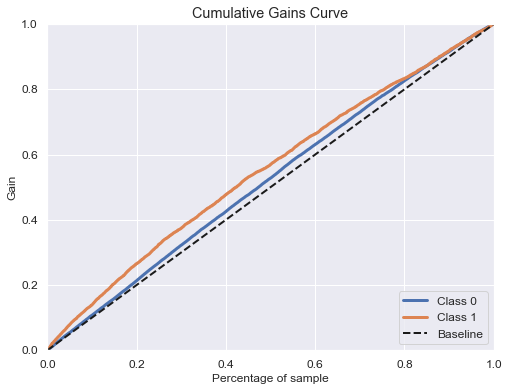

In [52]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_smenn, y_train_smenn)
predicted_probas = nb.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(y_test, predicted_probas, figsize=(8,6))
plt.show();

In [53]:
temp = RF_model_smenn.predict_proba(X_test)

df_temp = pd.DataFrame(temp)
df_temp.columns=['nochurn','churn']

pred_df = pd.DataFrame({"Actuals":y_test, "Predicted":y_pred_RF_smenn})
pred_df['MonthlyRevenue'] = X_test_copy['MonthlyRevenue']

pred_df.reset_index(inplace=True)

df_temp1 = pd.concat([pred_df, df_temp], axis=1)

df_temp1.sort_values(by='churn', ascending=False, inplace=True)

top20 = df_temp1[df_temp1['churn'] >= df_temp1.quantile(.8)['churn']][['MonthlyRevenue', 'Actuals', 'Predicted', 'churn']]


top20_percent_churn = top20['Actuals'].sum() / top20['Predicted'].sum()

print('The % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability = {:.01%}'.format(top20_percent_churn))

The % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability = 38.4%


In [54]:
print('Potential Monthly Revenue from targeting top 20% using best predictive model = ${:,.0f}'.format(top20.MonthlyRevenue.sum()))


Potential Monthly Revenue from targeting top 20% using best predictive model = $157,610
[CV 2/4] END criterion=gini, max_depth=1200, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=267;, score=0.833 total time=   8.9s
[CV 3/4] END criterion=entropy, max_depth=274, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=966;, score=0.832 total time=  42.5s
[CV 1/4] END criterion=gini, max_depth=1200, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=267;, score=0.747 total time=   9.2s
[CV 4/4] END criterion=entropy, max_depth=274, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=966;, score=0.829 total time=  42.3s
[CV 4/4] END criterion=gini, max_depth=1200, max_features=log2, min_samples_leaf=4, min_samples_split=14, n_estimators=267;, score=0.827 total time=   8.8s
[CV 2/4] END criterion=entropy, max_depth=274, max_features=sqrt, min_samples_leaf=8, min_samples_split=10, n_estimators=966;, s

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?

   39.9%

    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers? 
    
   $160,998



# End